# <b>Part I : Define an RL Environment</b>

In this part, we will define a grid-world reinforcement learning environment as an MDP. While building an RL environment, you need to define possible states, actions, rewards and other parameters.

### <b>STEPS :</b>

1. Choose a scenario for your grid world.

In [1]:
'''
Say that we are considering a theme of "Treasure Hunt"
OR in simple words we will try an RL environment for the
"Treasure Hunt" grid-world scenario"
'''

# Here, the agent's objective would be to find the treasure while
# avoiding / passing obstacles that comes in its path.

# Let's have a look into the details (as mentioned
# in the instruction prompt)

'''
Theme : Treasure Hunt Grid-World Environment using RL
where negative rewards for encountering obstacles and
positive result for finding out the treasure & checkpoint.

States : Grid size - 4 X 4 🔽
S1 = (0,0), S2 = (0,1), S3 = (0,2), S4 = (0,3)
S5 = (1,0), S6 = (1,1), S7 = (1,2), S8 = (1,3)
S9 = (2,0), S10 = (2,1), S11 = (2,2), S12 = (2,3)
S13 = (3,0), S14 = (3,1), S15 = (3,2), S16 = (3,3)

Actions : {UP, DOWN, RIGHT, LEFT}

Rewards : 🔽
Finding out the treasure : +50
Encountering Obstacle : -5
Encountering empty cell : 0
Reaching the checkpoint ('C') : +5

Objective : Finding the treasure with the largest cumulative reward
while dodging / passing over obstacles is the agent's mission.
'''

"\nTheme : Treasure Hunt Grid-World Environment using RL\nwhere negative rewards for encountering obstacles and\npositive result for finding out the treasure & checkpoint.\n\nStates : Grid size - 4 X 4 🔽\nS1 = (0,0), S2 = (0,1), S3 = (0,2), S4 = (0,3)\nS5 = (1,0), S6 = (1,1), S7 = (1,2), S8 = (1,3)\nS9 = (2,0), S10 = (2,1), S11 = (2,2), S12 = (2,3)\nS13 = (3,0), S14 = (3,1), S15 = (3,2), S16 = (3,3)\n\nActions : {UP, DOWN, RIGHT, LEFT}\n\nRewards : 🔽\nFinding out the treasure : +50\nEncountering Obstacle : -5\nEncountering empty cell : 0\nReaching the checkpoint ('C') : +5\n\nObjective : Finding the treasure with the largest cumulative reward\nwhile dodging / passing over obstacles is the agent's mission.\n"

<br>
<br>

2. Define an RL environment following the scenario that you chose.
Environment requirements :<br>
<br>
• Min number of states: 12<br>
• Min number of actions: 4<br>
• Min number of rewards: 4<br>

3. Run a random agent for at least 10 timesteps to show that the environment logic is defined correctly. Print the current state, chosen action, reward and return your grid world visualization for each step.

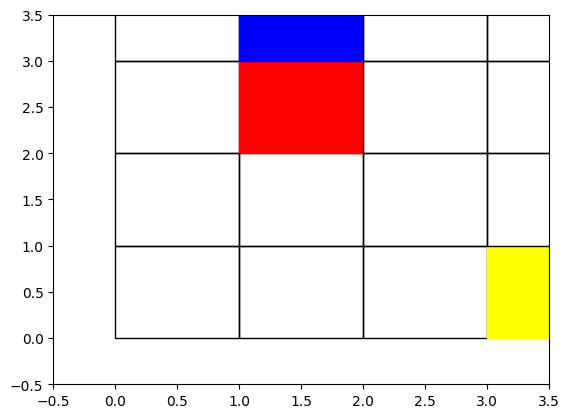

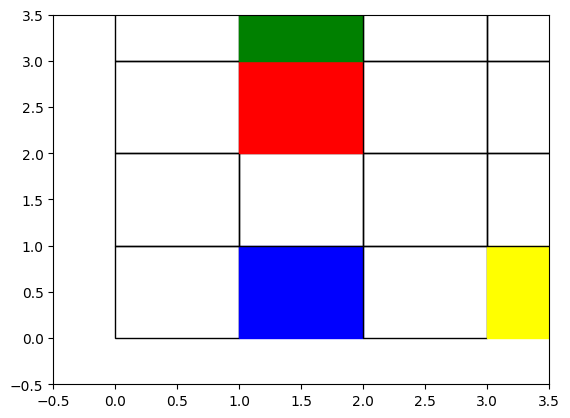

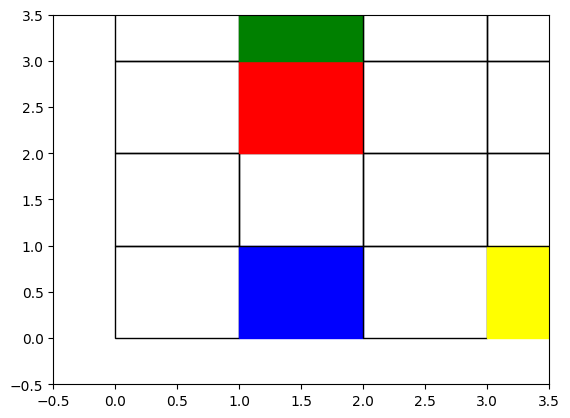

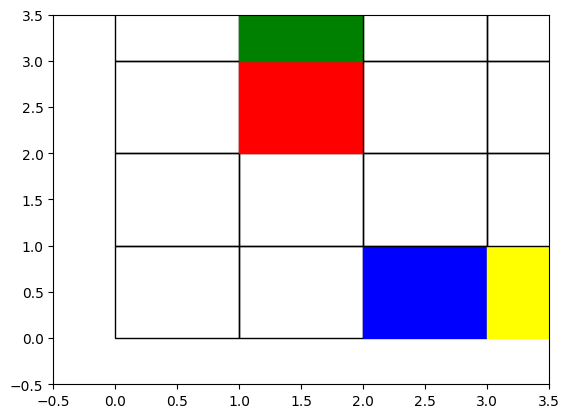

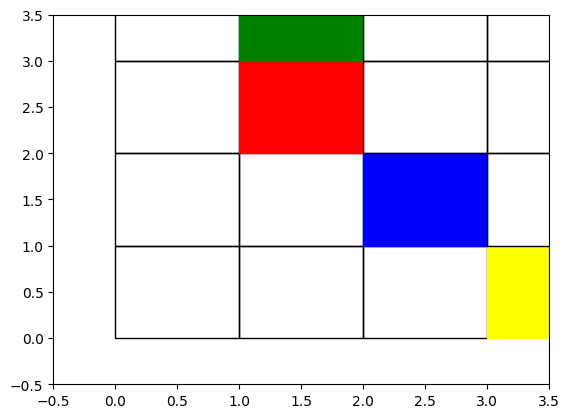

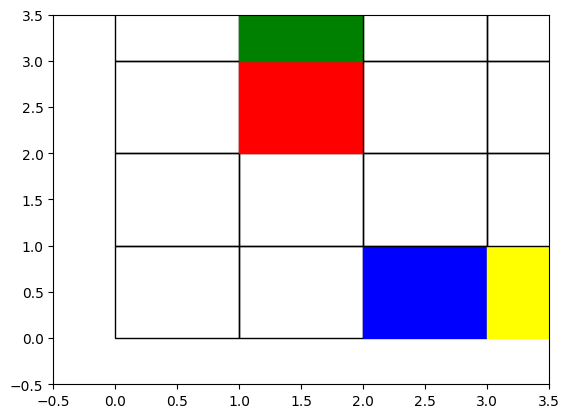

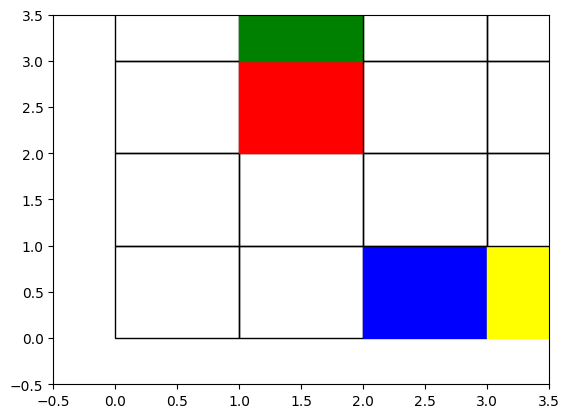

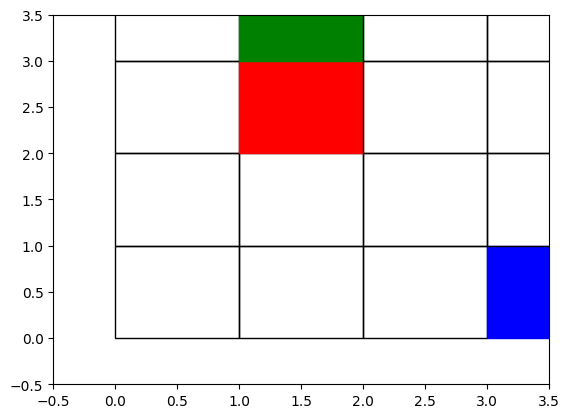

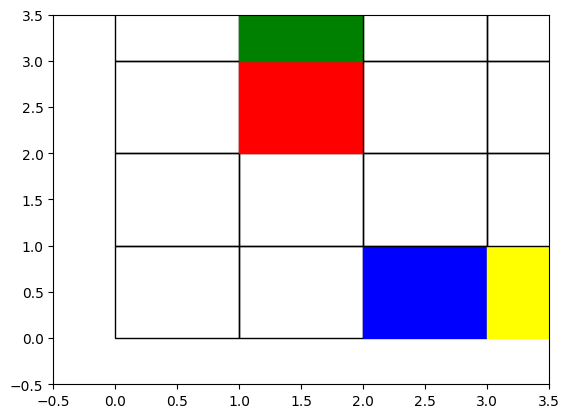

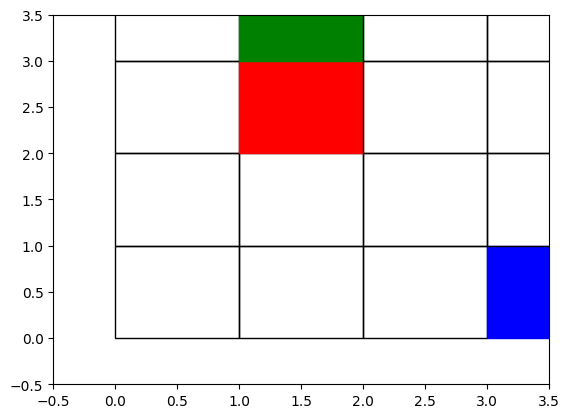

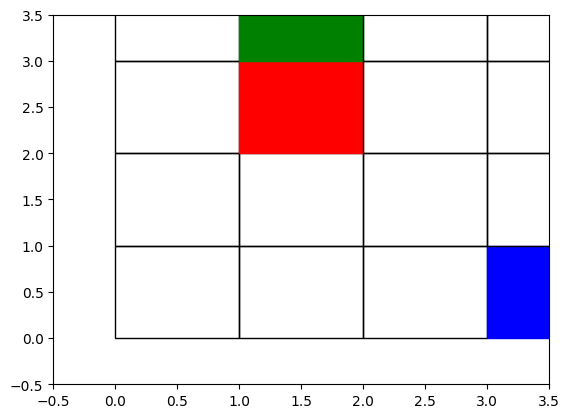

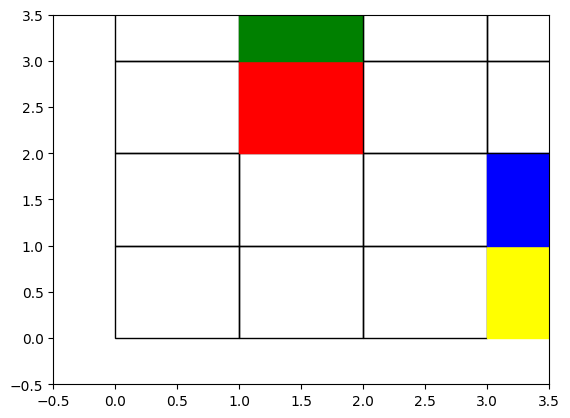

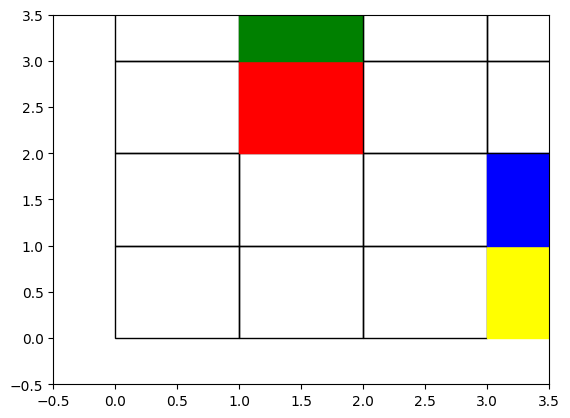

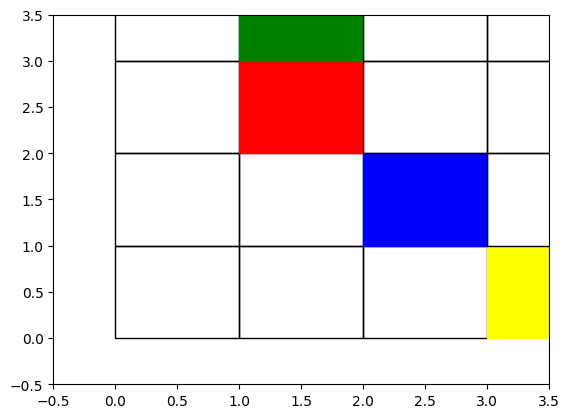

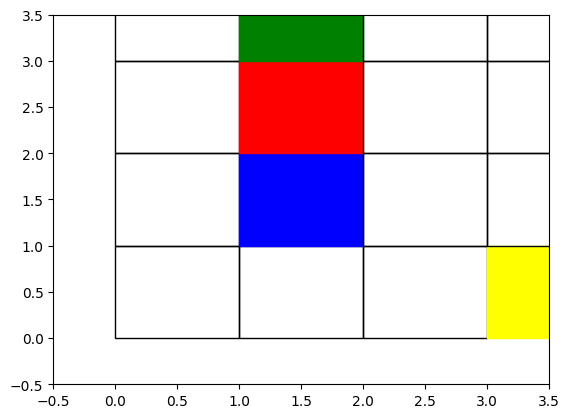

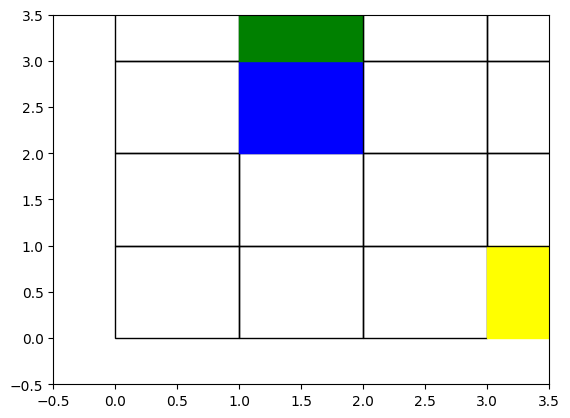

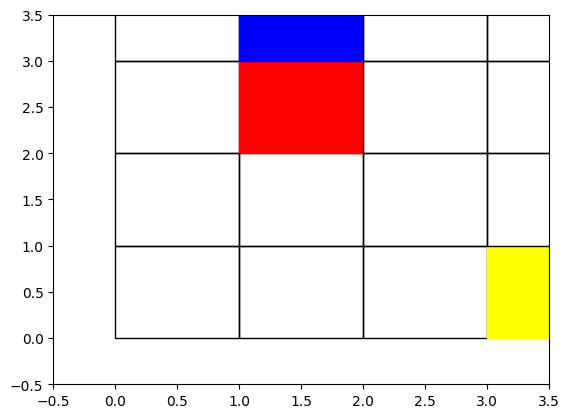

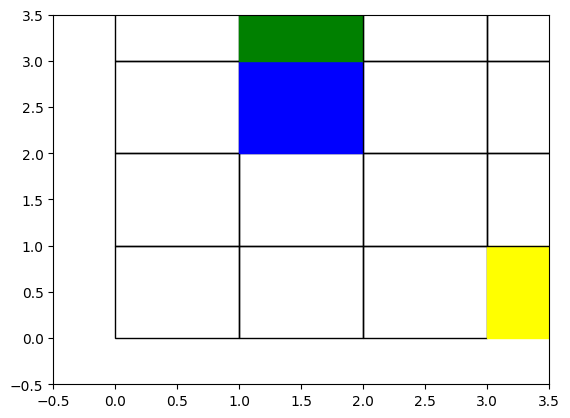

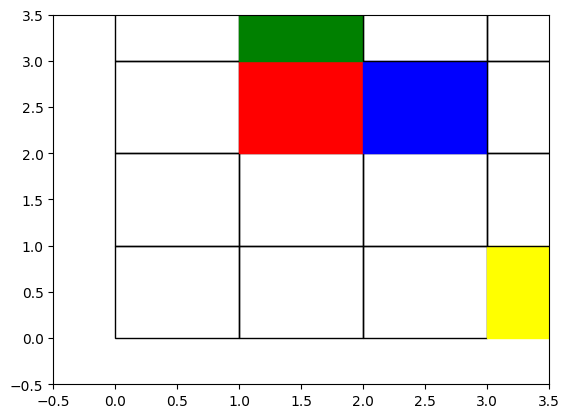

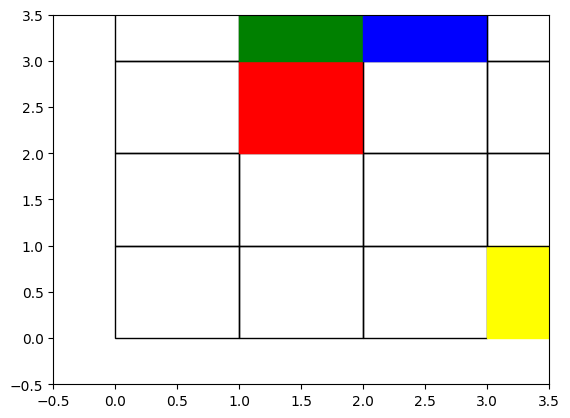

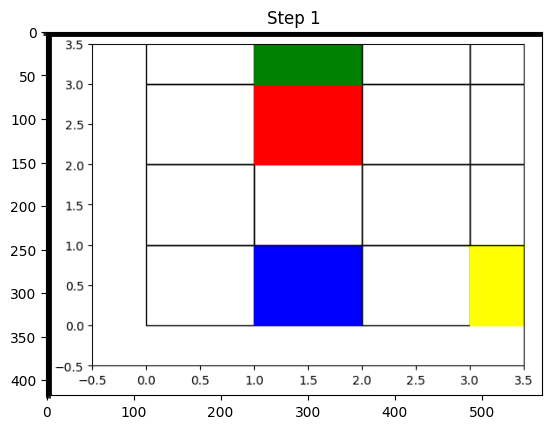

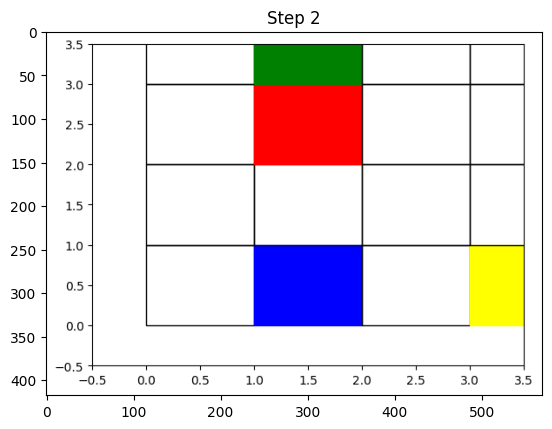

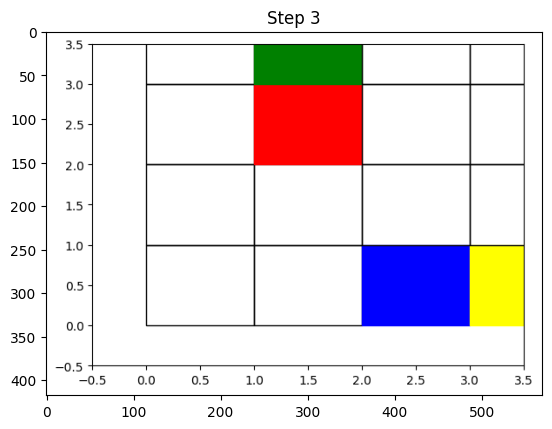

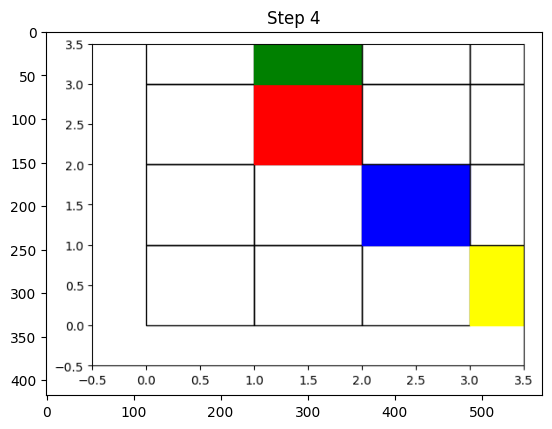

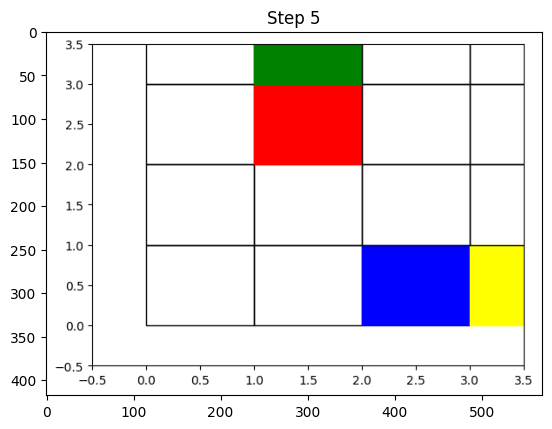

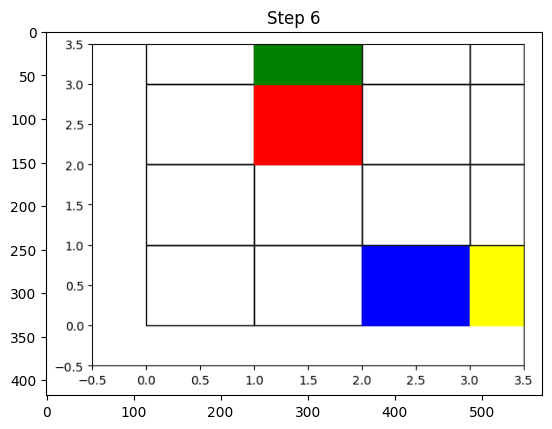

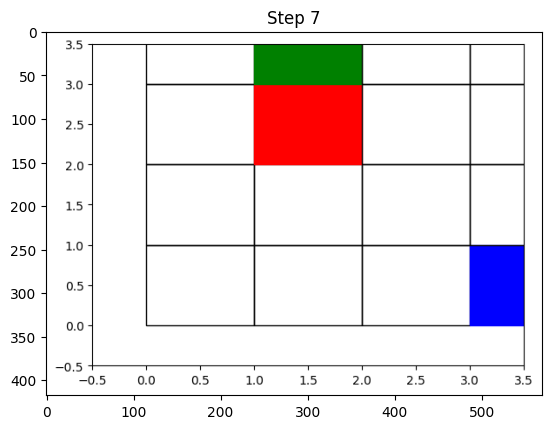

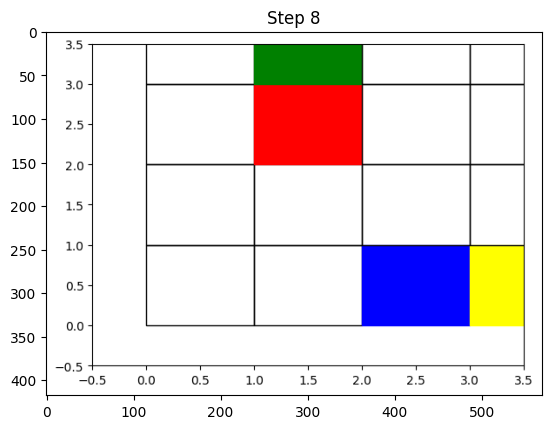

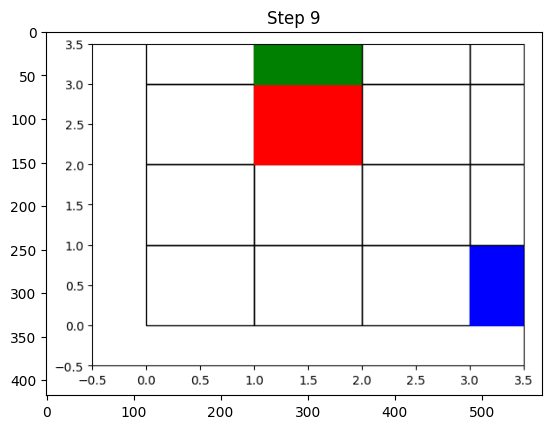

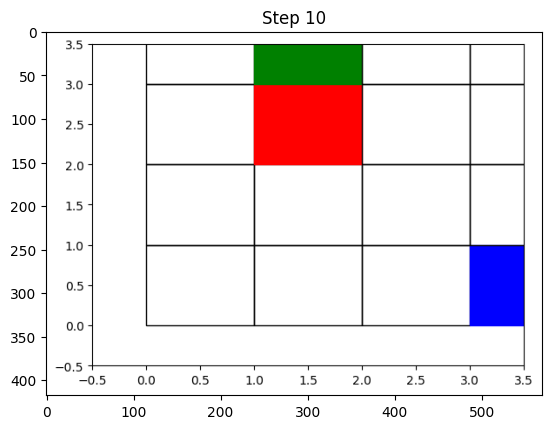

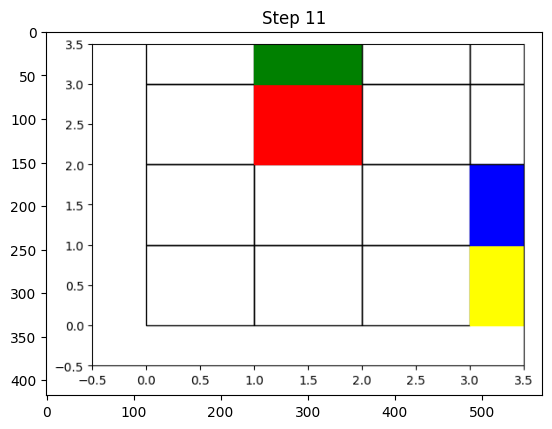

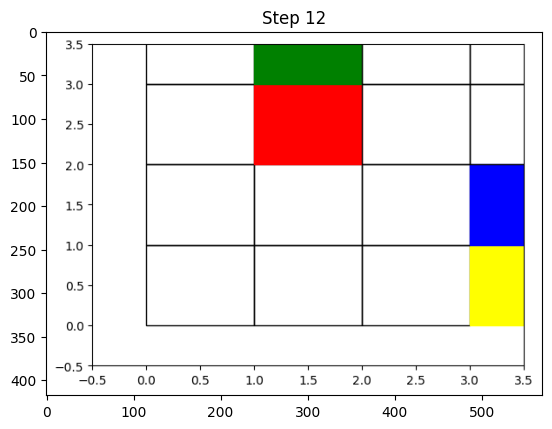

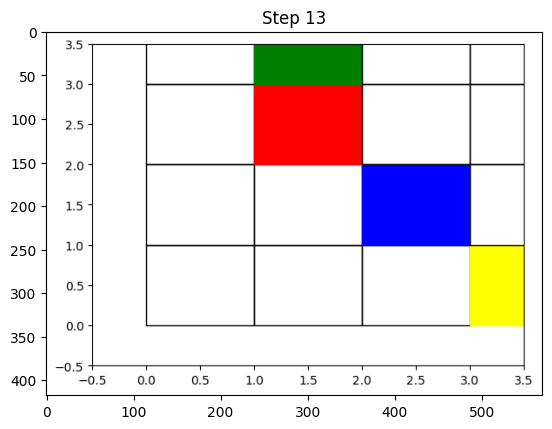

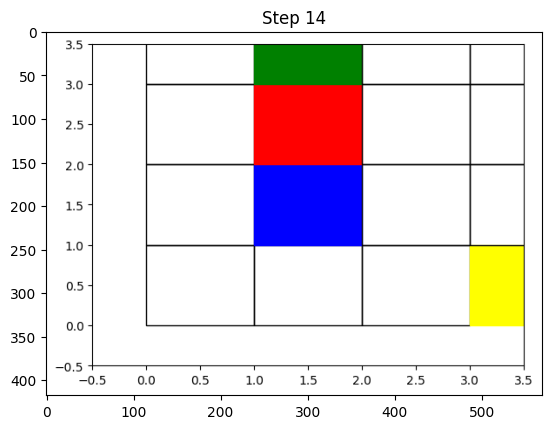

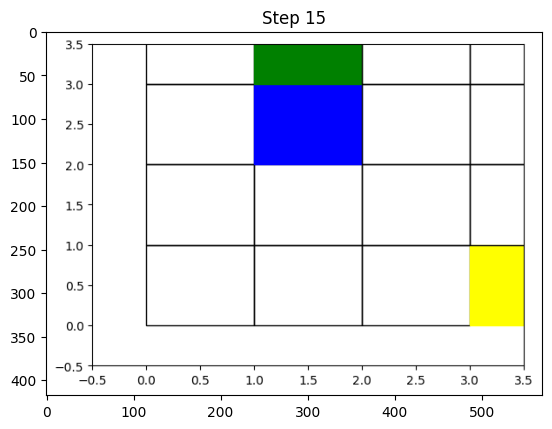

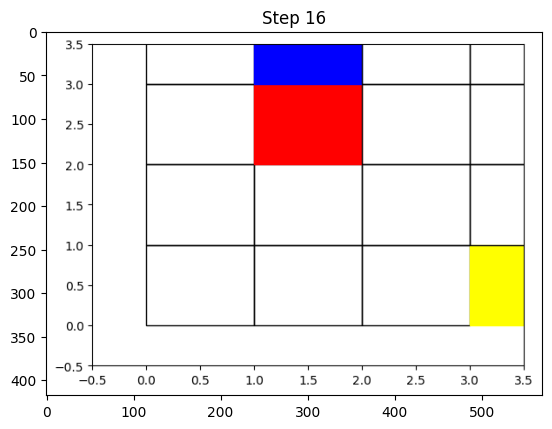

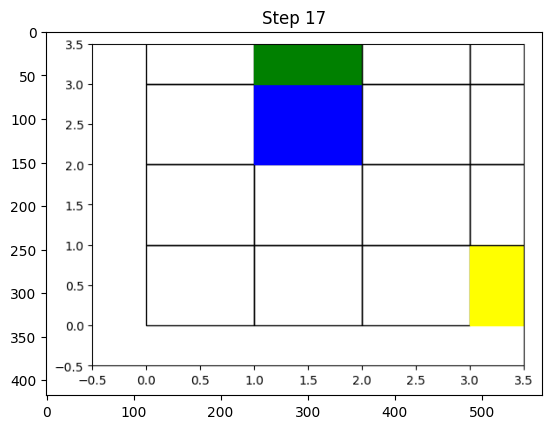

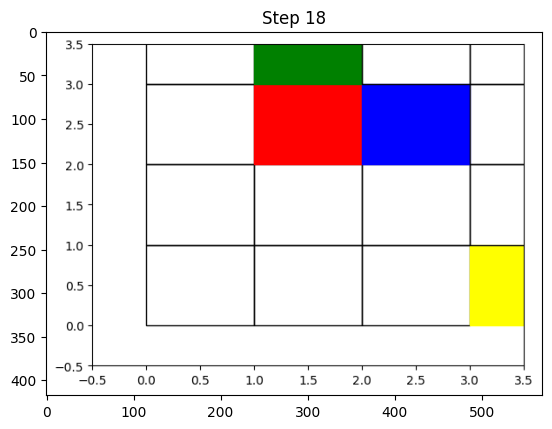

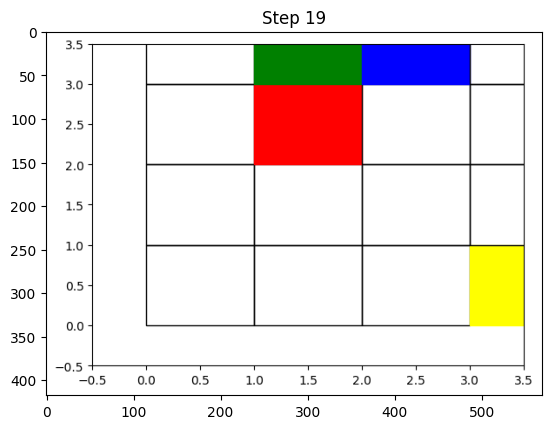

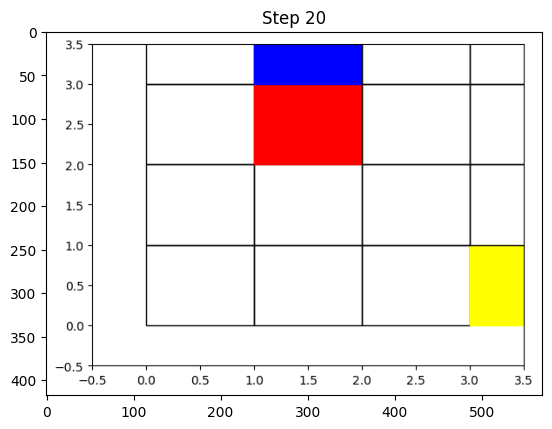

Step 1:
Current State: (0, 1)
Chosen Action: RIGHT
Reward: 0
Step 2:
Current State: (0, 1)
Chosen Action: DOWN
Reward: 0
Step 3:
Current State: (0, 2)
Chosen Action: RIGHT
Reward: 0
Step 4:
Current State: (1, 2)
Chosen Action: UP
Reward: 0
Step 5:
Current State: (0, 2)
Chosen Action: DOWN
Reward: 0
Step 6:
Current State: (0, 2)
Chosen Action: DOWN
Reward: 0
Step 7:
Current State: (0, 3)
Chosen Action: RIGHT
Reward: 50
Step 8:
Current State: (0, 2)
Chosen Action: LEFT
Reward: 0
Step 9:
Current State: (0, 3)
Chosen Action: RIGHT
Reward: 50
Step 10:
Current State: (0, 3)
Chosen Action: DOWN
Reward: 50
Step 11:
Current State: (1, 3)
Chosen Action: UP
Reward: 0
Step 12:
Current State: (1, 3)
Chosen Action: RIGHT
Reward: 0
Step 13:
Current State: (1, 2)
Chosen Action: LEFT
Reward: 0
Step 14:
Current State: (1, 1)
Chosen Action: LEFT
Reward: 0
Step 15:
Current State: (2, 1)
Chosen Action: UP
Reward: -5
Step 16:
Current State: (3, 1)
Chosen Action: UP
Reward: 5
Step 17:
Current State: (2, 1)
C

In [2]:
# Importing essential libraries
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython import display
import time
from IPython.display import display as ipy_display


class TreasureHuntEnv(gym.Env):
    def __init__(self):
        super(TreasureHuntEnv, self).__init__()

        # Environment parameters
        self.grid_size = 4
        self.states = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.actions = ['UP', 'DOWN', 'RIGHT', 'LEFT']

        # Defining action and observation spaces
        self.action_space = spaces.Discrete(len(self.actions))
        self.observation_space = spaces.Discrete(len(self.states))

        # Initial positions of treasure, obstacle, checkpoint, and agent
        self.treasure = (3,3)
        self.obstacle = (2,1)
        self.checkpoint = (3,1)
        self.agent_position = (0, 0)
        self.max_steps = 20
        self.current_step = 0

        '''
        # Visualization
        self.fig, self.ax = plt.subplots()
        '''

        # List to store images
        self.visualization_images = []

    def reset(self):
        # Resetting the environment to its initial state
        # Changing initial positions to ensure the agent reaches the treasure without obstacles
        self.treasure = (0, 3)
        self.obstacle = (2, 1)
        self.checkpoint = (3, 1)
        self.agent_position = (0, 0)
        self.current_step = 0

        # Clearing the list of visualization images
        self.visualization_images = []

        return self.agent_position

    def step(self, action):
        # Taking a step in the environment based on the given action
        if action not in self.actions:
            raise ValueError("Invalid action. Choose from {}".format(self.actions))

        # Checking if the maximum number of steps is reached
        if self.current_step >= self.max_steps:
            return self.agent_position, 0, True

        self.current_step += 1
        new_position = self.get_new_position(action)

        # Determining the reward and whether the episode is done
        reward = 0
        done=False
        if new_position == self.treasure:
            reward = 50
            done = True
        elif new_position == self.obstacle:
            reward = -5
            done = True
        elif new_position == self.checkpoint:
            reward = 5
            done = False

        self.agent_position = new_position
        return self.agent_position, reward, done

    def render(self):
        # Rendering the current state of the environment
        # self.ax.clear()
        fig, ax = plt.subplots()
        ax.clear()

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if (i, j) == self.agent_position:
                    ax.add_patch(Rectangle((j, i), 1, 1, fill=True, color='blue'))  # Agent position
                elif (i, j) == self.treasure:
                    ax.add_patch(Rectangle((j, i), 1, 1, fill=True, color='yellow'))  # Treasure
                elif (i, j) == self.obstacle:
                    ax.add_patch(Rectangle((j, i), 1, 1, fill=True, color='red'))  # Obstacle
                elif (i, j) == self.checkpoint:
                    ax.add_patch(Rectangle((j, i), 1, 1, fill=True, color='green'))  # Checkpoint
                else:
                    ax.add_patch(Rectangle((j, i), 1, 1, fill=False, edgecolor='black'))  # Empty cell

        ax.set_xticks(np.arange(-.5, self.grid_size, 1), minor=True)
        ax.set_yticks(np.arange(-.5, self.grid_size, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)

        display.clear_output(wait=True)  # Clearing the previous output
        display.display(fig)  # Displaying the updated plot

        # Saving the current state as an image and appending to the list
        image = np.array(fig.canvas.renderer.buffer_rgba())
        self.visualization_images.append(image)

    def get_new_position(self, action):
      if action == 'UP':
          return min(self.agent_position[0] + 1, self.grid_size - 1), self.agent_position[1]
      elif action == 'DOWN':
          return max(self.agent_position[0] - 1, 0), self.agent_position[1]
      elif action == 'RIGHT':
          return self.agent_position[0], min(self.agent_position[1] + 1, self.grid_size - 1)
      elif action == 'LEFT':
          return self.agent_position[0], max(self.agent_position[1] - 1, 0)

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Resetting the environment
state = env.reset()

# We need to store the results that we obtain at every single step
# We will later on print them altogether
steps = []
agent_positions = []
agent_actions = []
agent_rewards = []

# Running a random agent for 20 timesteps
for step in range(1, 21):
    action = env.action_space.sample()  # Random action
    next_state, reward, done = env.step(env.actions[action])

    # Printing current state, chosen action, reward
    print(f"Step {step}:")
    steps.append(step)
    print(f"Current State: {env.agent_position}")
    agent_positions.append(env.agent_position)
    print(f"Chosen Action: {env.actions[action]}")
    agent_actions.append(env.actions[action])
    print(f"Reward: {reward}")
    agent_rewards.append(reward)

    # Visualizing the environment
    env.render()

    '''
    if done:
        print("Game Over!")
        break

    # This condition is applied when the agent reaches
    # the goal state
    '''

    time.sleep(1)  # Pausing for 1 second to observe the visualization

# Displaying all stored grid views at the end
for i, image in enumerate(env.visualization_images):
    plt.imshow(image)
    plt.title(f"Step {i + 1}")
    plt.show()

# Displaying all the step results
for i,j,k,l in zip(steps, agent_positions, agent_actions, agent_rewards):
  print(f"Step {i}:")
  print(f"Current State: {j}")
  print(f"Chosen Action: {k}")
  print(f"Reward: {l}")

<br>
<br>

# <b>Part II : Implement SARSA</b>

In this part, we implement SARSA (State-Action-Reward-State-Action) algorithm and apply it to solve the environment defined in Part 1.
SARSA is an on-policy reinforcement learning algorithm. The agent updates its Q-values based on the current state, action, reward, and next state, action pair. It uses an exploration-exploitation strategy to balance between exploring new actions and exploiting the knowledge gained so far.

### <b>STEPS :</b>

1. Apply SARSA algorithm to solve the environment that was defined in Part I.

2. Provide the evaluation results:<br>
    a. Print the initial Q-table and the trained Q-table<br>
    b. Plot the total reward per episode graph (x-axis: episode, y-axis: total reward per episode).<br>
    c. Plot the epsilon decay graph (x-axis: episode, y-axis: epsilon value)<br>
    d. Run your environment for at least 10 episodes, where the agent chooses only greedy actions from the learned policy. Include a plot of the total reward per episode.

In [3]:
class SarsaAgent:
    def __init__(self, action_space, observation_space, alpha=0.2, gamma=0.99, initial_epsilon=1, epsilon_decay=0.994):
        self.action_space = action_space
        self.observation_space = observation_space
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = initial_epsilon  # Exploration-exploitation trade-off
        self.epsilon_decay = epsilon_decay  # Epsilon decay factor
        # self.q_table = np.zeros((self.observation_space.n, self.action_space.n))
        self.q_table = np.full((self.observation_space.n, self.action_space.n), 0)
        self.state = {(0,0):0, (0,1):1, (0,2):2, (0,3):3,
                      (1,0):4, (1,1):5, (1,2):6, (1,3):7,
                      (2,0):8, (2,1):9, (2,2):10, (2,3):11,
                      (3,0):12, (3,1):13, (3,2):14, (3,3):15}

    def choose_action(self, state):
        # Epsilon-greedy action selection
        if np.random.rand() < self.epsilon:
            return self.action_space.sample()  # Exploration
        else:
            valid_action = np.argmax(self.q_table[state])
            # print(f"valid action : {valid_action}")
            # print(f"State : {state}")
            # print(f"self.q_table[state, :] ==> {self.q_table[state, :]}")
            # print(f"max : {np.max(self.q_table[state, :])}")
            return valid_action

    def update_q_table(self, state, action, reward, next_state, next_action):
        # SARSA update rule
        current_q = self.q_table[state, action]
        next_q = self.q_table[next_state, next_action]
        new_q = current_q + self.alpha * (reward + self.gamma * next_q - current_q)
        self.q_table[state, action] = new_q

    def decay_epsilon(self, episode_number):
        # Adaptive exponential decay for epsilon based on episode number
        self.epsilon *= self.epsilon_decay

        # Ensuring epsilon doesn't go below a certain threshold
        min_epsilon = 0.01
        self.epsilon = max(self.epsilon, min_epsilon)


# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating SARSA agent with modified parameters
agent = SarsaAgent(env.action_space, env.observation_space)

# Printing the initial Q-table
print("Initial Q-table : 🔽")
print(agent.q_table)

Initial Q-table : 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: -15
Episode 2, Cumulative Reward: 20
Episode 3, Cumulative Reward: 0
Episode 4, Cumulative Reward: 45
Episode 5, Cumulative Reward: 5
Episode 6, Cumulative Reward: 0
Episode 7, Cumulative Reward: 45
Episode 8, Cumulative Reward: 40
Episode 9, Cumulative Reward: 100
Episode 10, Cumulative Reward: -5
Episode 11, Cumulative Reward: -15
Episode 12, Cumulative Reward: 0
Episode 13, Cumulative Reward: -10
Episode 14, Cumulative Reward: -10
Episode 15, Cumulative Reward: 45
Episode 16, Cumulative Reward: 100
Episode 17, Cumulative Reward: -15
Episode 18, Cumulative Reward: 5
Episode 19, Cumulative Reward: -5
Episode 20, Cumulative Reward: -5
Episode 21, Cumulative Reward: 100
Episode 22, Cumulative Reward: -5
Episode 23, Cumulative Reward: -15
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: 50
Episode 26, Cumulative Reward: 50
Episode 27, Cumulative Reward: 40
Episode 28, Cumulative Reward: 5
Episode 29, Cumulative Reward: -5
Episode 30, Cumulati

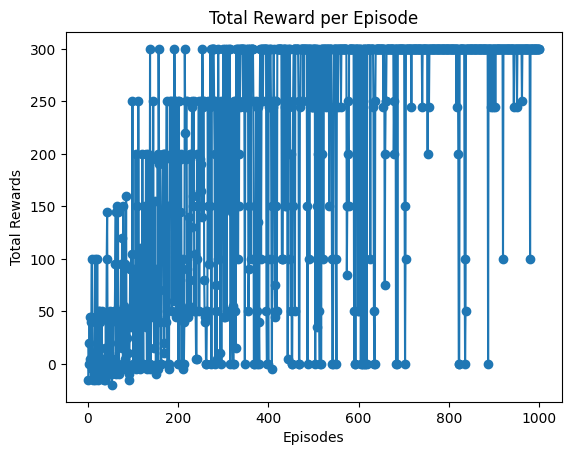

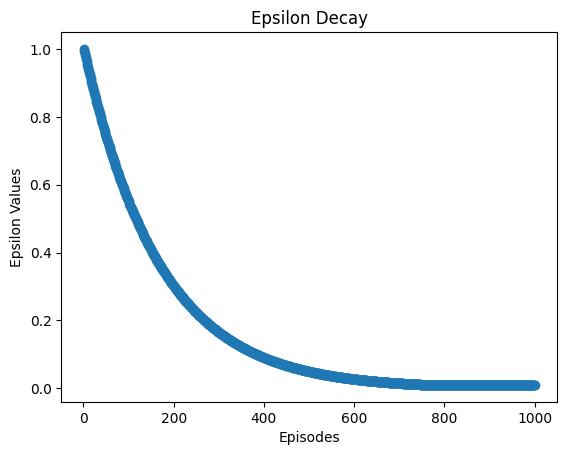

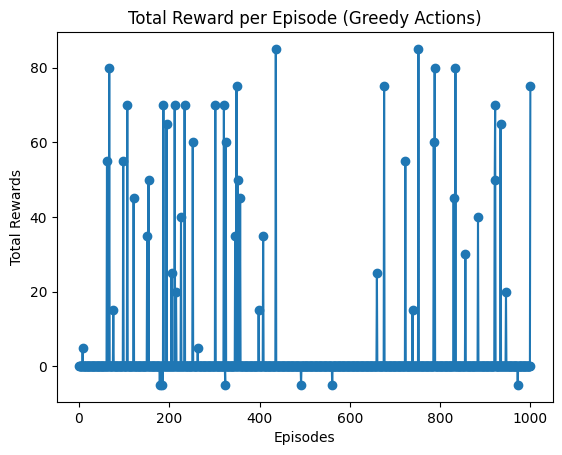

In [4]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards_sarsa_base = []

# List to store the epsilon values
epsilons_sarsa_base = []

# Running the SARSA agent for 1000 episodes
custom_episodes_sarsa_base = 1000
for episode in range(1, custom_episodes_sarsa_base+1):
    total_reward = 0

    # Storing the epsilons
    epsilons_sarsa_base.append(agent.epsilon)

    # Running the SARSA agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using SARSA agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using SARSA agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using SARSA update rule
        agent.update_q_table(state, action_index, reward, next_state, next_action_index)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards_sarsa_base.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-table
print("Trained Q-table : 🔽")
print(agent.q_table)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes_sarsa_base+1), episode_rewards_sarsa_base, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes_sarsa_base+1), epsilons_sarsa_base, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 1000 episodes with greedy actions
greedy_episodes_sarsa_base = 1000
greedy_rewards_sarsa_base = []

for episode in range(1, greedy_episodes_sarsa_base + 1):
    total_reward = 0

    # Running the SARSA agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using SARSA agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards_sarsa_base.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes_sarsa_base + 1), greedy_rewards_sarsa_base, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

<br>
<br>

3. Hyperparameter tuning : Select at least two hyperparameters to tune to get better results for SARSA. You can explore hyperparameter tuning libraries, e.g. Optuna or make it manually. Parameters to tune (select 2):<br>
• Discount factor (γ)<br>
• Epsilon decay rate<br>
• Epsilon min/max values<br>
• Number of episodes<br>
• Max timesteps<br>
<br>
Try at least 3 different values for each of the parameters that you choose.

4. Provide the evaluation results (refer to Step 2) and your explanation for each result for each hyperparameter. In total, you should complete Step 2 seven times [Base model (step 1) + Hyperparameter #1 x 3 difference values & Hyperparameter #2 x 3 difference values]. Make your suggestion on the most efficient hyperparameters values for your problem setup.

In [5]:
# Here we will try to optimize the 2 hyperparameters :
# 1. Number of Episodes
# 2. Discount Factor

In [6]:
# SET 1 : Episodes = 2000

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating SARSA agent with modified parameters
agent = SarsaAgent(env.action_space, env.observation_space)

# Printing the initial Q-table
print("Initial Q-table : 🔽")
print(agent.q_table)

Initial Q-table : 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 0
Episode 2, Cumulative Reward: -5
Episode 3, Cumulative Reward: -5
Episode 4, Cumulative Reward: -5
Episode 5, Cumulative Reward: -5
Episode 6, Cumulative Reward: -5
Episode 7, Cumulative Reward: -10
Episode 8, Cumulative Reward: -15
Episode 9, Cumulative Reward: -10
Episode 10, Cumulative Reward: 15
Episode 11, Cumulative Reward: -15
Episode 12, Cumulative Reward: 0
Episode 13, Cumulative Reward: -10
Episode 14, Cumulative Reward: -10
Episode 15, Cumulative Reward: -10
Episode 16, Cumulative Reward: 0
Episode 17, Cumulative Reward: 5
Episode 18, Cumulative Reward: -10
Episode 19, Cumulative Reward: 0
Episode 20, Cumulative Reward: -5
Episode 21, Cumulative Reward: -10
Episode 22, Cumulative Reward: -5
Episode 23, Cumulative Reward: 0
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: 0
Episode 26, Cumulative Reward: -15
Episode 27, Cumulative Reward: 40
Episode 28, Cumulative Reward: 5
Episode 29, Cumulative Reward: 0
Episode 30, Cumulative

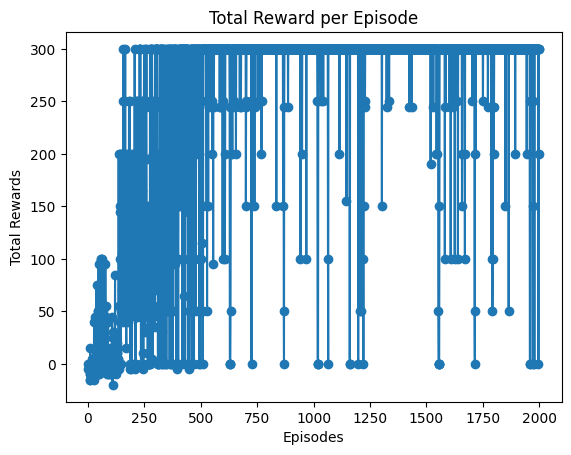

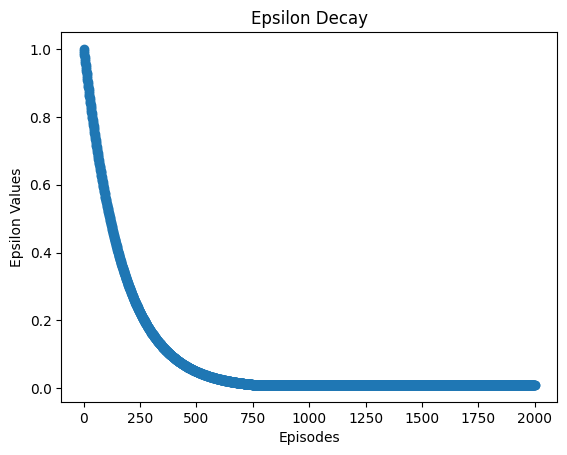

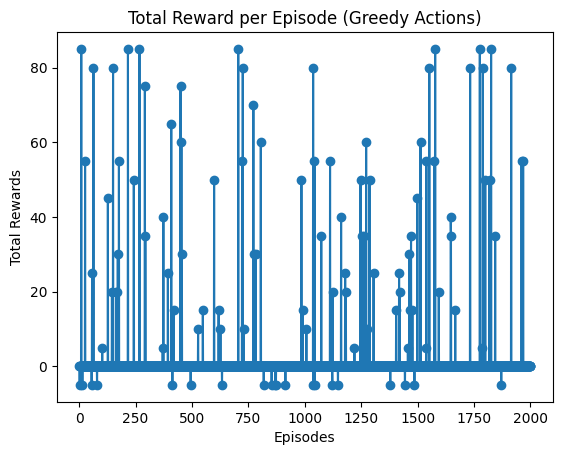

In [7]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the SARSA agent for 2000 episodes
custom_episodes = 2000
for episode in range(1, custom_episodes+1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the SARSA agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using SARSA agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using SARSA agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using SARSA update rule
        agent.update_q_table(state, action_index, reward, next_state, next_action_index)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-table
print("Trained Q-table : 🔽")
print(agent.q_table)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes+1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes+1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 2000 episodes with greedy actions
greedy_episodes = 2000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the SARSA agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using SARSA agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [8]:
# SET 2 : Episodes = 3000

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating SARSA agent with modified parameters
agent = SarsaAgent(env.action_space, env.observation_space)

# Printing the initial Q-table
print("Initial Q-table : 🔽")
print(agent.q_table)

Initial Q-table : 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 0
Episode 2, Cumulative Reward: 100
Episode 3, Cumulative Reward: -5
Episode 4, Cumulative Reward: 0
Episode 5, Cumulative Reward: -10
Episode 6, Cumulative Reward: -5
Episode 7, Cumulative Reward: 10
Episode 8, Cumulative Reward: 45
Episode 9, Cumulative Reward: 55
Episode 10, Cumulative Reward: 5
Episode 11, Cumulative Reward: 50
Episode 12, Cumulative Reward: 15
Episode 13, Cumulative Reward: 0
Episode 14, Cumulative Reward: 0
Episode 15, Cumulative Reward: 50
Episode 16, Cumulative Reward: 45
Episode 17, Cumulative Reward: -10
Episode 18, Cumulative Reward: 45
Episode 19, Cumulative Reward: 45
Episode 20, Cumulative Reward: -10
Episode 21, Cumulative Reward: -15
Episode 22, Cumulative Reward: -5
Episode 23, Cumulative Reward: 40
Episode 24, Cumulative Reward: 5
Episode 25, Cumulative Reward: 100
Episode 26, Cumulative Reward: 0
Episode 27, Cumulative Reward: 50
Episode 28, Cumulative Reward: 0
Episode 29, Cumulative Reward: -5
Episode 30, Cumulative Re

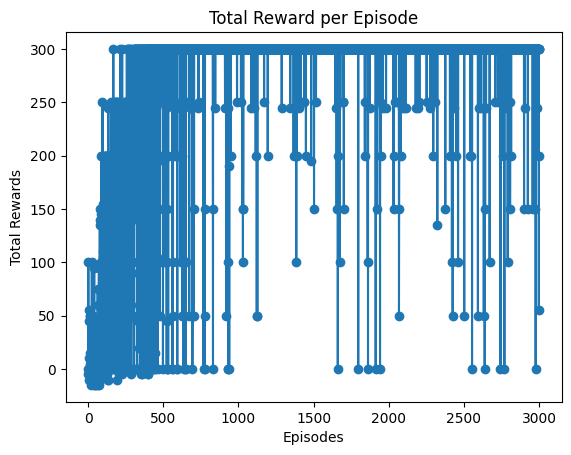

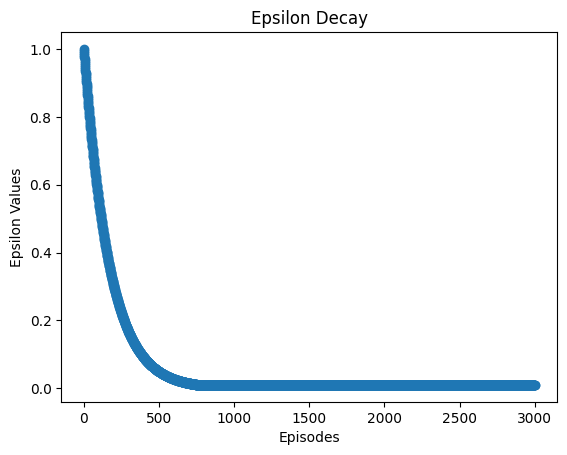

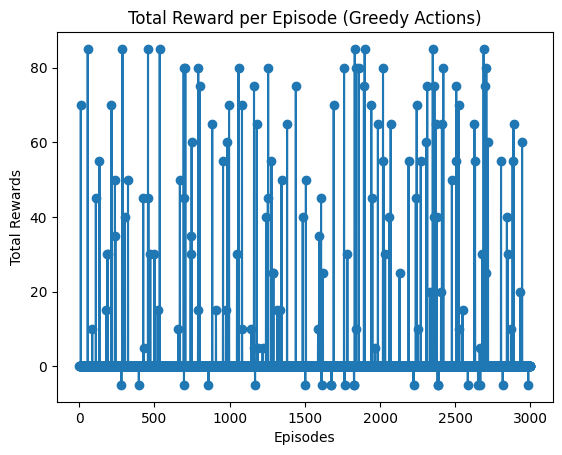

In [9]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the SARSA agent for 3000 episodes
custom_episodes = 3000
for episode in range(1, custom_episodes+1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the SARSA agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using SARSA agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using SARSA agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using SARSA update rule
        agent.update_q_table(state, action_index, reward, next_state, next_action_index)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-table
print("Trained Q-table : 🔽")
print(agent.q_table)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes+1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes+1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 3000 episodes with greedy actions
greedy_episodes = 3000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the SARSA agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using SARSA agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [10]:
# SET 3 : Episodes = 4000

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating SARSA agent with modified parameters
agent = SarsaAgent(env.action_space, env.observation_space)

# Printing the initial Q-table
print("Initial Q-table : 🔽")
print(agent.q_table)

Initial Q-table : 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 0
Episode 2, Cumulative Reward: 0
Episode 3, Cumulative Reward: 40
Episode 4, Cumulative Reward: 40
Episode 5, Cumulative Reward: 45
Episode 6, Cumulative Reward: 15
Episode 7, Cumulative Reward: 5
Episode 8, Cumulative Reward: 95
Episode 9, Cumulative Reward: 50
Episode 10, Cumulative Reward: 0
Episode 11, Cumulative Reward: 50
Episode 12, Cumulative Reward: 5
Episode 13, Cumulative Reward: 50
Episode 14, Cumulative Reward: 5
Episode 15, Cumulative Reward: 100
Episode 16, Cumulative Reward: -10
Episode 17, Cumulative Reward: 5
Episode 18, Cumulative Reward: -10
Episode 19, Cumulative Reward: 100
Episode 20, Cumulative Reward: -10
Episode 21, Cumulative Reward: 10
Episode 22, Cumulative Reward: -10
Episode 23, Cumulative Reward: 45
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: 0
Episode 26, Cumulative Reward: 50
Episode 27, Cumulative Reward: 0
Episode 28, Cumulative Reward: 45
Episode 29, Cumulative Reward: -10
Episode 30, Cumulative Re

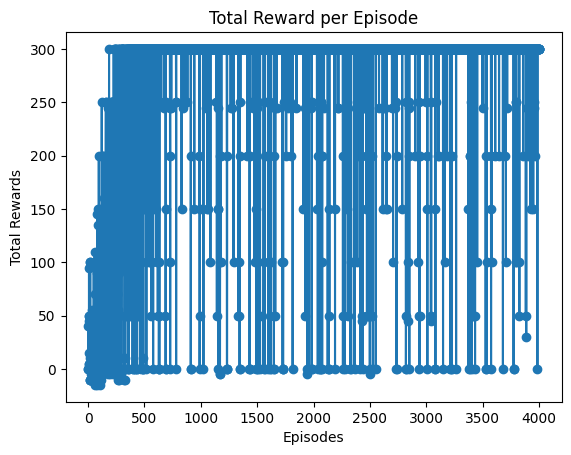

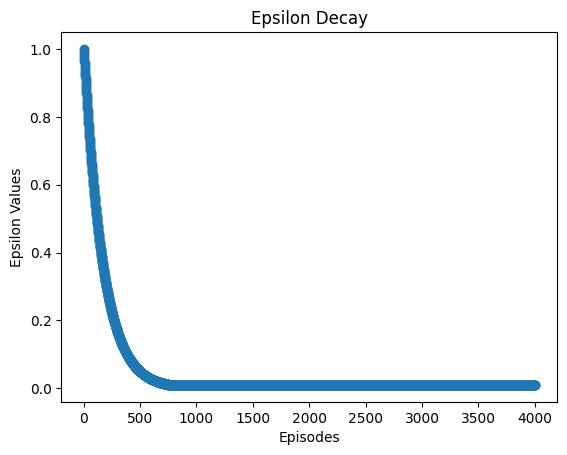

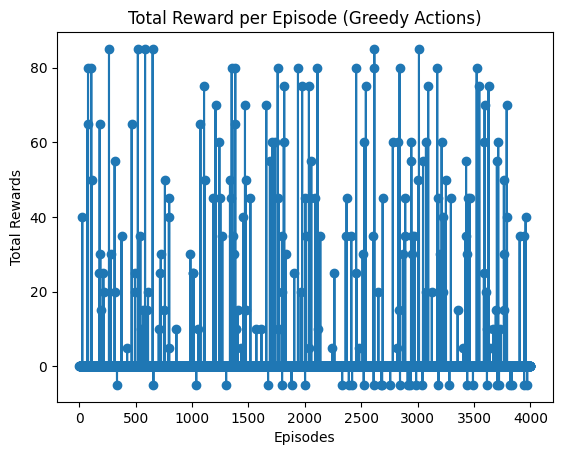

In [11]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the SARSA agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes+1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the SARSA agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using SARSA agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using SARSA agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using SARSA update rule
        agent.update_q_table(state, action_index, reward, next_state, next_action_index)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-table
print("Trained Q-table : 🔽")
print(agent.q_table)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes+1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes+1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the SARSA agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using SARSA agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [12]:
#  SET 4 : gamma = 0.91

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating SARSA agent with modified parameters
agent = SarsaAgent(env.action_space, env.observation_space, gamma = 0.91)

# Printing the initial Q-table
print("Initial Q-table : 🔽")
print(agent.q_table)

Initial Q-table : 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 45
Episode 2, Cumulative Reward: -10
Episode 3, Cumulative Reward: -5
Episode 4, Cumulative Reward: -5
Episode 5, Cumulative Reward: -5
Episode 6, Cumulative Reward: 50
Episode 7, Cumulative Reward: -10
Episode 8, Cumulative Reward: 0
Episode 9, Cumulative Reward: 45
Episode 10, Cumulative Reward: 45
Episode 11, Cumulative Reward: -5
Episode 12, Cumulative Reward: -5
Episode 13, Cumulative Reward: 50
Episode 14, Cumulative Reward: -5
Episode 15, Cumulative Reward: 0
Episode 16, Cumulative Reward: 95
Episode 17, Cumulative Reward: 15
Episode 18, Cumulative Reward: 45
Episode 19, Cumulative Reward: 50
Episode 20, Cumulative Reward: -10
Episode 21, Cumulative Reward: 40
Episode 22, Cumulative Reward: 40
Episode 23, Cumulative Reward: 0
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: -5
Episode 26, Cumulative Reward: 5
Episode 27, Cumulative Reward: 45
Episode 28, Cumulative Reward: -5
Episode 29, Cumulative Reward: 145
Episode 30, Cumulative 

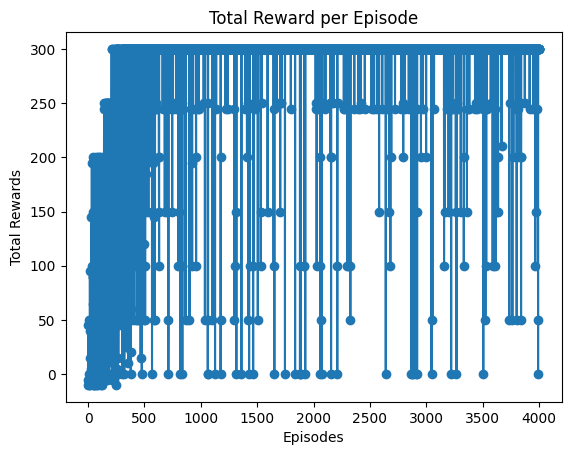

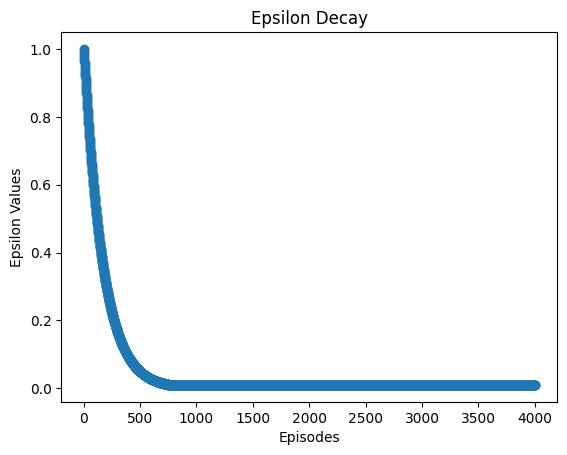

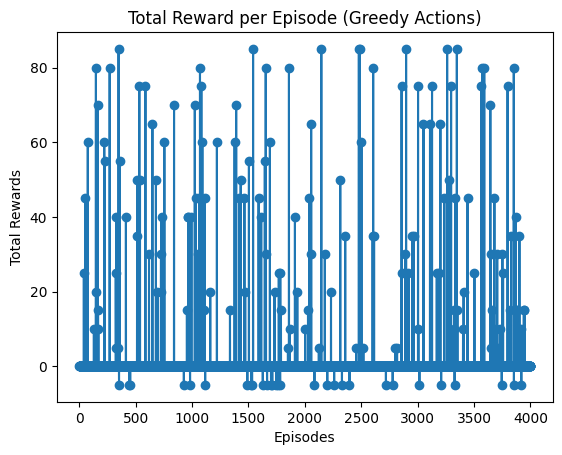

In [13]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the SARSA agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes+1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the SARSA agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using SARSA agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using SARSA agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using SARSA update rule
        agent.update_q_table(state, action_index, reward, next_state, next_action_index)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-table
print("Trained Q-table : 🔽")
print(agent.q_table)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes+1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes+1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the SARSA agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using SARSA agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [14]:
#  SET 5 : gamma = 0.93

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating SARSA agent with modified parameters
agent = SarsaAgent(env.action_space, env.observation_space, gamma = 0.93)

# Printing the initial Q-table
print("Initial Q-table : 🔽")
print(agent.q_table)

Initial Q-table : 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 55
Episode 2, Cumulative Reward: 45
Episode 3, Cumulative Reward: 0
Episode 4, Cumulative Reward: 45
Episode 5, Cumulative Reward: -5
Episode 6, Cumulative Reward: 5
Episode 7, Cumulative Reward: -5
Episode 8, Cumulative Reward: -10
Episode 9, Cumulative Reward: -5
Episode 10, Cumulative Reward: 0
Episode 11, Cumulative Reward: -10
Episode 12, Cumulative Reward: 0
Episode 13, Cumulative Reward: 50
Episode 14, Cumulative Reward: 50
Episode 15, Cumulative Reward: -5
Episode 16, Cumulative Reward: -10
Episode 17, Cumulative Reward: -5
Episode 18, Cumulative Reward: 95
Episode 19, Cumulative Reward: -5
Episode 20, Cumulative Reward: 0
Episode 21, Cumulative Reward: -5
Episode 22, Cumulative Reward: 45
Episode 23, Cumulative Reward: -5
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: 15
Episode 26, Cumulative Reward: 45
Episode 27, Cumulative Reward: 0
Episode 28, Cumulative Reward: -5
Episode 29, Cumulative Reward: 50
Episode 30, Cumulative Rew

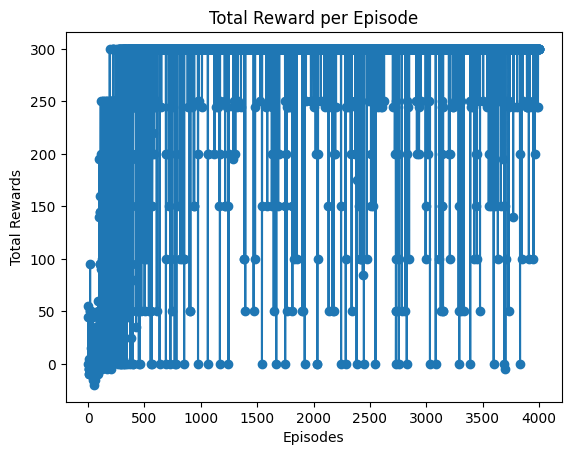

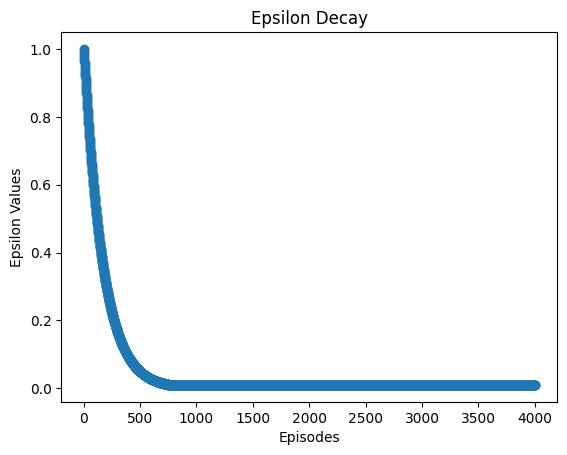

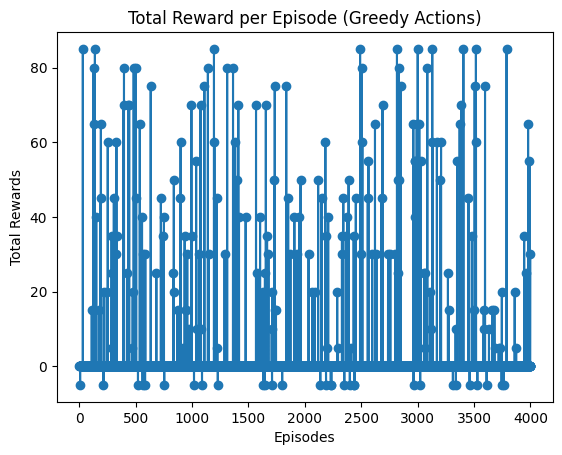

In [15]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the SARSA agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes+1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the SARSA agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using SARSA agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using SARSA agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using SARSA update rule
        agent.update_q_table(state, action_index, reward, next_state, next_action_index)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-table
print("Trained Q-table : 🔽")
print(agent.q_table)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes+1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes+1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the SARSA agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using SARSA agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [16]:
#  SET 6 : gamma = 0.97

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating SARSA agent with modified parameters
agent = SarsaAgent(env.action_space, env.observation_space, gamma = 0.97)

# Printing the initial Q-table
print("Initial Q-table : 🔽")
print(agent.q_table)

Initial Q-table : 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: -5
Episode 2, Cumulative Reward: -10
Episode 3, Cumulative Reward: 0
Episode 4, Cumulative Reward: 5
Episode 5, Cumulative Reward: 0
Episode 6, Cumulative Reward: 50
Episode 7, Cumulative Reward: 0
Episode 8, Cumulative Reward: -10
Episode 9, Cumulative Reward: 45
Episode 10, Cumulative Reward: 0
Episode 11, Cumulative Reward: 20
Episode 12, Cumulative Reward: 0
Episode 13, Cumulative Reward: -10
Episode 14, Cumulative Reward: -5
Episode 15, Cumulative Reward: -5
Episode 16, Cumulative Reward: -10
Episode 17, Cumulative Reward: -5
Episode 18, Cumulative Reward: 0
Episode 19, Cumulative Reward: 40
Episode 20, Cumulative Reward: -5
Episode 21, Cumulative Reward: 0
Episode 22, Cumulative Reward: 10
Episode 23, Cumulative Reward: 0
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: 5
Episode 26, Cumulative Reward: 40
Episode 27, Cumulative Reward: -10
Episode 28, Cumulative Reward: 10
Episode 29, Cumulative Reward: 30
Episode 30, Cumulative Rewar

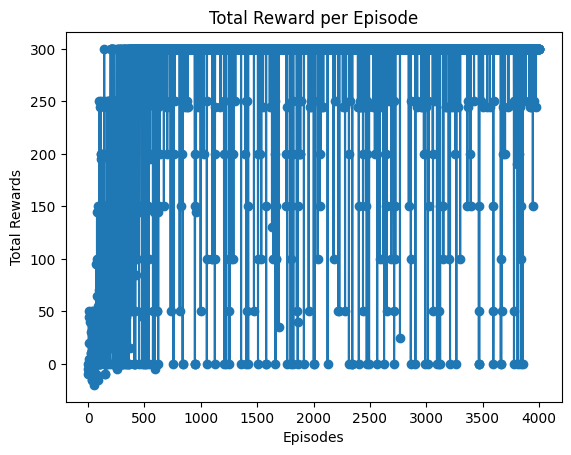

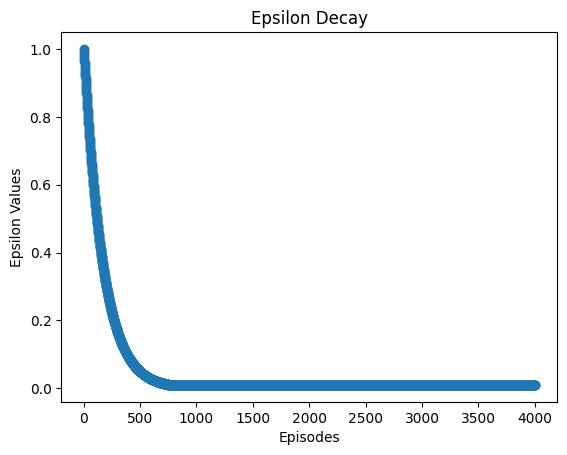

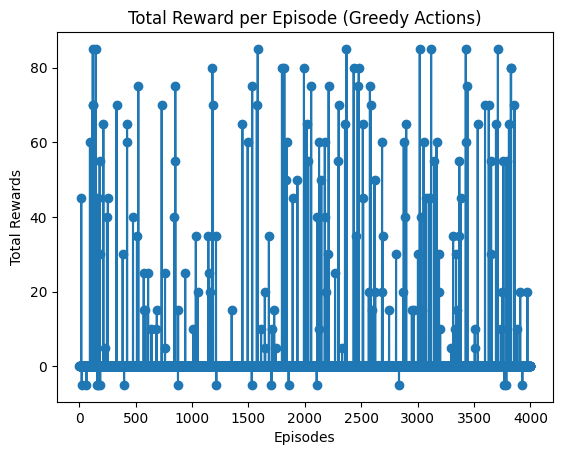

In [17]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the SARSA agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes+1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the SARSA agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using SARSA agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using SARSA agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using SARSA update rule
        agent.update_q_table(state, action_index, reward, next_state, next_action_index)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-table
print("Trained Q-table : 🔽")
print(agent.q_table)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes+1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes+1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the SARSA agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using SARSA agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [18]:
# After observing all the sets - they don't have much differences
# Only the first (base) implementation seems good - which seems to
# have less complications.

<br>
<br>

# <b>Part III : Implement Double Q-Learning</b>

In this part, we apply Double Q-learning algorithm to solve the environment defined in Part 1.

### <b>STEPS :</b>

1. Apply Double Q-learning algorithm to solve the environment that was defined in Part I. You can modify your code from Part II.

2. Provide the evaluation results:<br>
a. Print the initial Q-tables and the trained Q-tables.<br>
b. Plot the total reward per episode graph (x-axis: episode, y-axis: total reward per episode).<br>
c. Plot the epsilon decay graph (x-axis: episode, y-axis: epsilon value)<br>
d. Run your environment for at least 10 episodes, where the agent chooses only greedy actions from the learned policy. Include a plot of the total reward per episode.<br>

In [19]:
class DoubleQAgent:
    def __init__(self, action_space, observation_space, alpha=0.2, gamma=0.99, initial_epsilon=1, epsilon_decay=0.994):
        self.action_space = action_space
        self.observation_space = observation_space
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = initial_epsilon  # Exploration-exploitation trade-off
        self.epsilon_decay = epsilon_decay  # Epsilon decay factor

        # Creating two Q-tables, Q1 and Q2
        self.q_table1 = np.full((self.observation_space.n, self.action_space.n), 0)
        self.q_table2 = np.full((self.observation_space.n, self.action_space.n), 0)

        self.state = {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3,
                      (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
                      (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
                      (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15}

    def choose_action(self, state):
        # Epsilon-greedy action selection using the sum of Q-values from both tables
        if np.random.rand() < self.epsilon:
            return self.action_space.sample()  # Exploration
        else:
            combined_q_values = self.q_table1[state] + self.q_table2[state]
            return np.argmax(combined_q_values)

    def update_q_tables(self, state, action, reward, next_state):
        # Randomly selecting one of the Q-tables for updating
        if np.random.rand() < 0.5:
            q1 = self.q_table1
            q2 = self.q_table2
        else:
            q1 = self.q_table2
            q2 = self.q_table1

        # Finding the best action using Q1 but update Q2
        best_action = np.argmax(q1[next_state])
        new_q = q1[state, action] + self.alpha * (reward + self.gamma * q2[next_state, best_action] - q1[state, action])
        q1[state, action] = new_q

    def decay_epsilon(self, episode_number):
        # Adaptive exponential decay for epsilon based on episode number
        self.epsilon *= self.epsilon_decay

        # Ensuring epsilon doesn't go below a certain threshold
        min_epsilon = 0.01
        self.epsilon = max(self.epsilon, min_epsilon)

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating Double Q-learning agent with modified parameters
agent = DoubleQAgent(env.action_space, env.observation_space)

# Printing the initial Q-tables
print("Initial Q-table 1: 🔽")
print(agent.q_table1)
print("Initial Q-table 2: 🔽")
print(agent.q_table2)

Initial Q-table 1: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Initial Q-table 2: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 50
Episode 2, Cumulative Reward: 45
Episode 3, Cumulative Reward: -5
Episode 4, Cumulative Reward: 50
Episode 5, Cumulative Reward: 50
Episode 6, Cumulative Reward: 50
Episode 7, Cumulative Reward: 0
Episode 8, Cumulative Reward: -5
Episode 9, Cumulative Reward: 95
Episode 10, Cumulative Reward: -10
Episode 11, Cumulative Reward: 50
Episode 12, Cumulative Reward: -10
Episode 13, Cumulative Reward: -5
Episode 14, Cumulative Reward: 100
Episode 15, Cumulative Reward: -10
Episode 16, Cumulative Reward: 95
Episode 17, Cumulative Reward: 20
Episode 18, Cumulative Reward: -5
Episode 19, Cumulative Reward: 40
Episode 20, Cumulative Reward: -5
Episode 21, Cumulative Reward: -10
Episode 22, Cumulative Reward: 0
Episode 23, Cumulative Reward: -5
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: -10
Episode 26, Cumulative Reward: 0
Episode 27, Cumulative Reward: 10
Episode 28, Cumulative Reward: 0
Episode 29, Cumulative Reward: -10
Episode 30, Cumulati

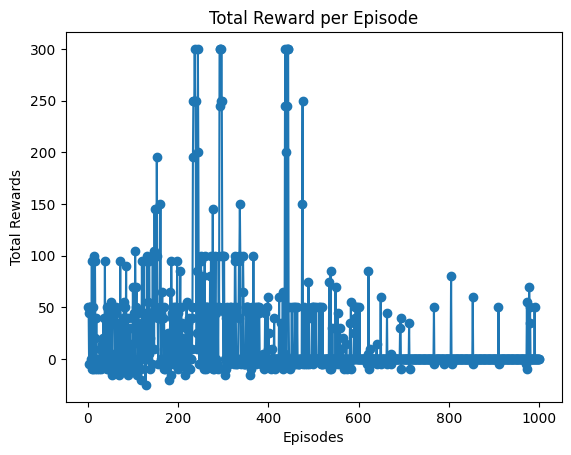

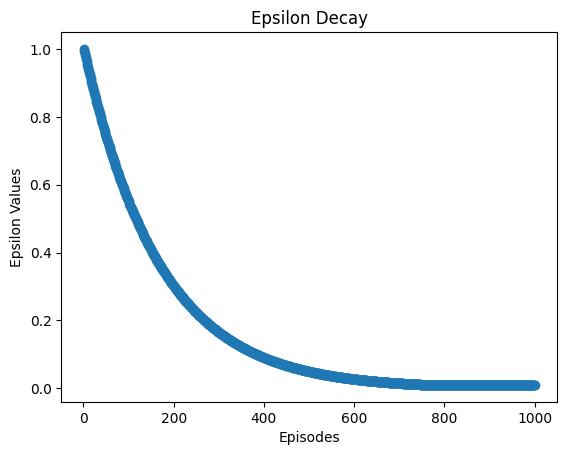

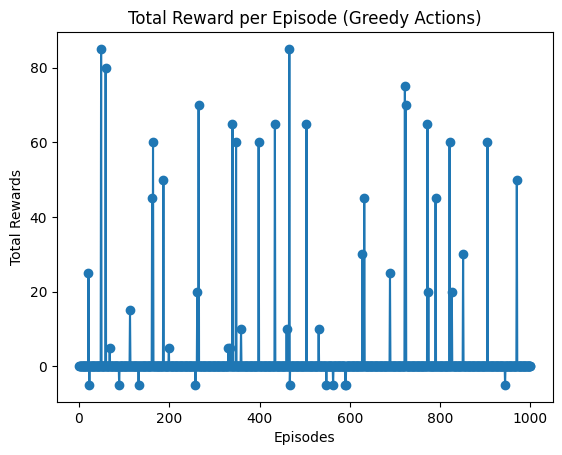

In [20]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards_doubleQsarsa_base = []

# List to store the epsilon values
epsilons_doubleQsarsa_base = []

# Running the Double-Q agent for 1000 episodes
custom_episodes_doubleQsarsa_base = 1000
for episode in range(1, custom_episodes_doubleQsarsa_base + 1):
    total_reward = 0

    # Storing the epsilons
    epsilons_doubleQsarsa_base.append(agent.epsilon)

    # Running the Double-Q agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using Double-Q agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using Double Q-learning agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using Double Q-learning update rule
        agent.update_q_tables(state, action_index, reward, next_state)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards_doubleQsarsa_base.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-tables
print("Trained Q-table 1: 🔽")
print(agent.q_table1)
print("Trained Q-table 2: 🔽")
print(agent.q_table2)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes_doubleQsarsa_base + 1), episode_rewards_doubleQsarsa_base, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes_doubleQsarsa_base + 1), epsilons_doubleQsarsa_base, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 1000 episodes with greedy actions
greedy_episodes_doubleQsarsa_base = 1000
greedy_rewards_doubleQsarsa_base = []

for episode in range(1, greedy_episodes_doubleQsarsa_base + 1):
    total_reward = 0

    # Running the Double Q-learning agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using Double Q-learning agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards_doubleQsarsa_base.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes_doubleQsarsa_base + 1), greedy_rewards_doubleQsarsa_base, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

3. Hyperparameter tuning. Select at least two hyperparameters to tune to get better results for Double Q-learning. You can explore hyperparameter tuning libraries, e.g. Optuna or make it manually. Parameters to tune (select 2):<br>
• Discount factor (γ)<br>
• Epsilon decay rate<br>
• Epsilon min/max values<br>
• Number of episodes<br>
• Max timesteps<br>
<br>
Try at least 3 different values for each of the parameters that you choose.

4. Provide the evaluation results (refer to Step 2) and your explanation for each result for each hyperparameter. In total, you should complete Step 2 seven times [Base model (step 1) + Hyperparameter #1 x 3 difference values & Hyperparameter #2 x 3 difference values]. Make your suggestion on the most efficient hyperparameters values for your problem setup.

In [21]:
# Here we will try to optimize the 2 hyperparameters :
# 1. Number of Episodes
# 2. Discount Factor

In [22]:
# SET 1 : Episodes = 2000

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating Double Q-learning agent with modified parameters
agent = DoubleQAgent(env.action_space, env.observation_space)

# Printing the initial Q-tables
print("Initial Q-table 1: 🔽")
print(agent.q_table1)
print("Initial Q-table 2: 🔽")
print(agent.q_table2)

Initial Q-table 1: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Initial Q-table 2: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: -15
Episode 2, Cumulative Reward: -5
Episode 3, Cumulative Reward: 5
Episode 4, Cumulative Reward: 40
Episode 5, Cumulative Reward: 0
Episode 6, Cumulative Reward: -5
Episode 7, Cumulative Reward: 0
Episode 8, Cumulative Reward: 50
Episode 9, Cumulative Reward: -10
Episode 10, Cumulative Reward: 40
Episode 11, Cumulative Reward: -15
Episode 12, Cumulative Reward: -5
Episode 13, Cumulative Reward: 0
Episode 14, Cumulative Reward: -10
Episode 15, Cumulative Reward: 0
Episode 16, Cumulative Reward: 40
Episode 17, Cumulative Reward: 45
Episode 18, Cumulative Reward: -10
Episode 19, Cumulative Reward: 40
Episode 20, Cumulative Reward: -10
Episode 21, Cumulative Reward: 5
Episode 22, Cumulative Reward: 50
Episode 23, Cumulative Reward: -10
Episode 24, Cumulative Reward: 0
Episode 25, Cumulative Reward: 0
Episode 26, Cumulative Reward: -5
Episode 27, Cumulative Reward: -5
Episode 28, Cumulative Reward: -5
Episode 29, Cumulative Reward: 30
Episode 30, Cumulative R

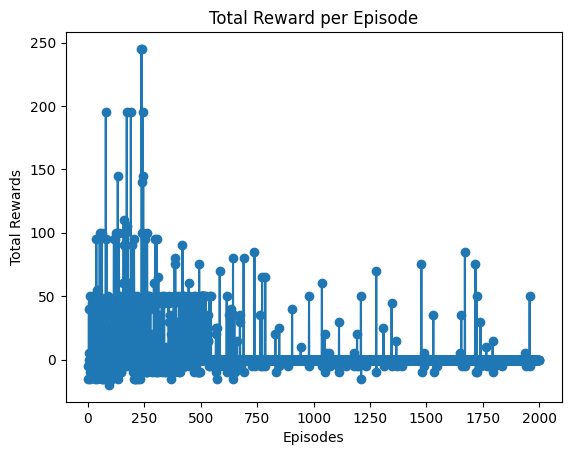

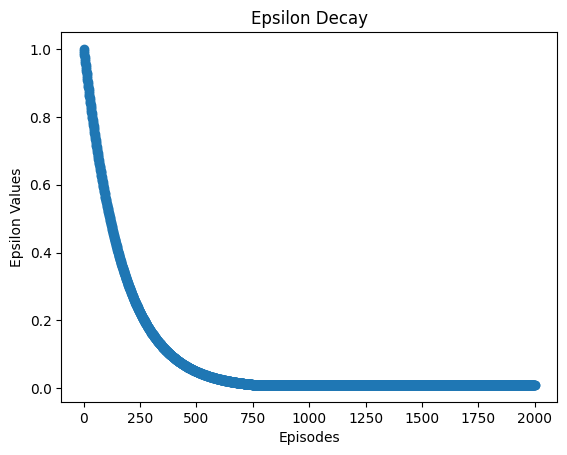

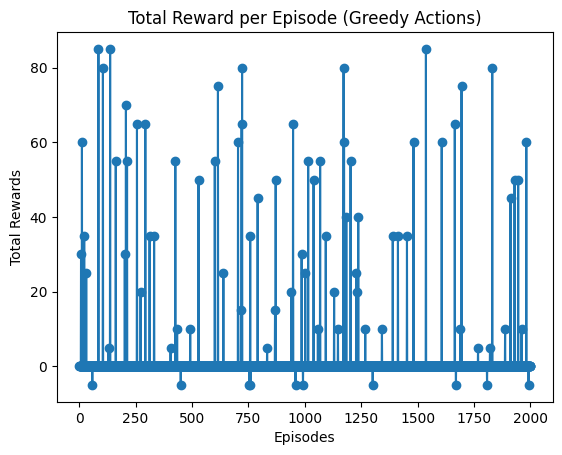

In [23]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the Double-Q agent for 2000 episodes
custom_episodes = 2000
for episode in range(1, custom_episodes + 1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the Double-Q agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using Double-Q agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using Double Q-learning agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using Double Q-learning update rule
        agent.update_q_tables(state, action_index, reward, next_state)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-tables
print("Trained Q-table 1: 🔽")
print(agent.q_table1)
print("Trained Q-table 2: 🔽")
print(agent.q_table2)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes + 1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes + 1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 2000 episodes with greedy actions
greedy_episodes = 2000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the Double Q-learning agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using Double Q-learning agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [24]:
# SET 2 : Episodes = 3000

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating Double Q-learning agent with modified parameters
agent = DoubleQAgent(env.action_space, env.observation_space)

# Printing the initial Q-tables
print("Initial Q-table 1: 🔽")
print(agent.q_table1)
print("Initial Q-table 2: 🔽")
print(agent.q_table2)

Initial Q-table 1: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Initial Q-table 2: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: -10
Episode 2, Cumulative Reward: 45
Episode 3, Cumulative Reward: 0
Episode 4, Cumulative Reward: -5
Episode 5, Cumulative Reward: -5
Episode 6, Cumulative Reward: 0
Episode 7, Cumulative Reward: -10
Episode 8, Cumulative Reward: 50
Episode 9, Cumulative Reward: 50
Episode 10, Cumulative Reward: 5
Episode 11, Cumulative Reward: 40
Episode 12, Cumulative Reward: -10
Episode 13, Cumulative Reward: 0
Episode 14, Cumulative Reward: 50
Episode 15, Cumulative Reward: 0
Episode 16, Cumulative Reward: 0
Episode 17, Cumulative Reward: -10
Episode 18, Cumulative Reward: 100
Episode 19, Cumulative Reward: -5
Episode 20, Cumulative Reward: 100
Episode 21, Cumulative Reward: -5
Episode 22, Cumulative Reward: 45
Episode 23, Cumulative Reward: 95
Episode 24, Cumulative Reward: 95
Episode 25, Cumulative Reward: 5
Episode 26, Cumulative Reward: -5
Episode 27, Cumulative Reward: -10
Episode 28, Cumulative Reward: 20
Episode 29, Cumulative Reward: 50
Episode 30, Cumulative 

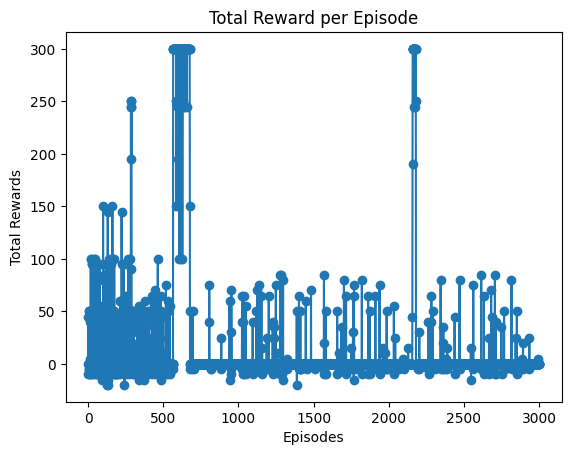

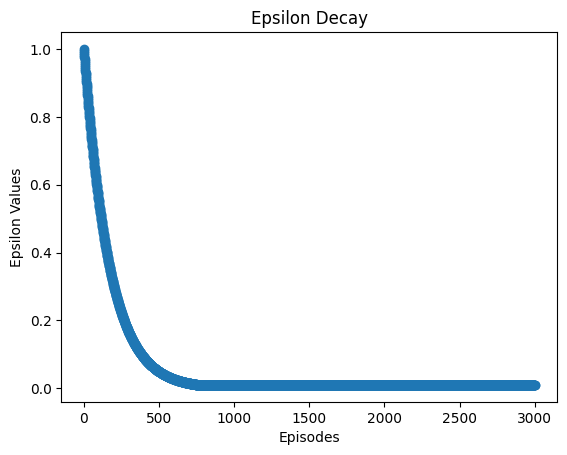

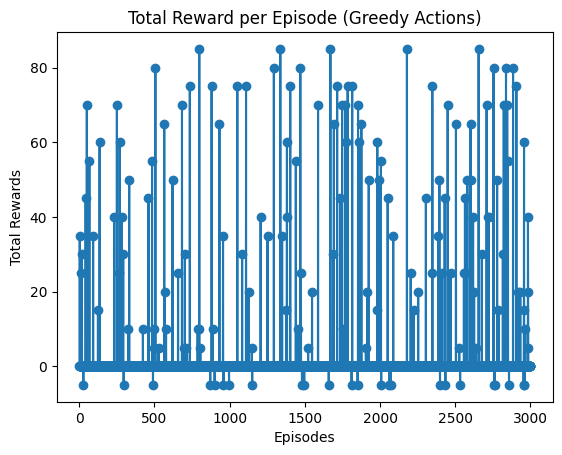

In [25]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the Double-Q agent for 3000 episodes
custom_episodes = 3000
for episode in range(1, custom_episodes + 1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the Double-Q agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using Double-Q agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using Double Q-learning agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using Double Q-learning update rule
        agent.update_q_tables(state, action_index, reward, next_state)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-tables
print("Trained Q-table 1: 🔽")
print(agent.q_table1)
print("Trained Q-table 2: 🔽")
print(agent.q_table2)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes + 1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes + 1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 3000 episodes with greedy actions
greedy_episodes = 3000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the Double Q-learning agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using Double Q-learning agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [26]:
# SET 3 : Episodes = 4000

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating Double Q-learning agent with modified parameters
agent = DoubleQAgent(env.action_space, env.observation_space)

# Printing the initial Q-tables
print("Initial Q-table 1: 🔽")
print(agent.q_table1)
print("Initial Q-table 2: 🔽")
print(agent.q_table2)

Initial Q-table 1: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Initial Q-table 2: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: -5
Episode 2, Cumulative Reward: -5
Episode 3, Cumulative Reward: -10
Episode 4, Cumulative Reward: -5
Episode 5, Cumulative Reward: -5
Episode 6, Cumulative Reward: 45
Episode 7, Cumulative Reward: 0
Episode 8, Cumulative Reward: 0
Episode 9, Cumulative Reward: 0
Episode 10, Cumulative Reward: -5
Episode 11, Cumulative Reward: -5
Episode 12, Cumulative Reward: -10
Episode 13, Cumulative Reward: 50
Episode 14, Cumulative Reward: 40
Episode 15, Cumulative Reward: 0
Episode 16, Cumulative Reward: 40
Episode 17, Cumulative Reward: 50
Episode 18, Cumulative Reward: -5
Episode 19, Cumulative Reward: -10
Episode 20, Cumulative Reward: 45
Episode 21, Cumulative Reward: -5
Episode 22, Cumulative Reward: -5
Episode 23, Cumulative Reward: 50
Episode 24, Cumulative Reward: -10
Episode 25, Cumulative Reward: 50
Episode 26, Cumulative Reward: 40
Episode 27, Cumulative Reward: 0
Episode 28, Cumulative Reward: 50
Episode 29, Cumulative Reward: 100
Episode 30, Cumulative 

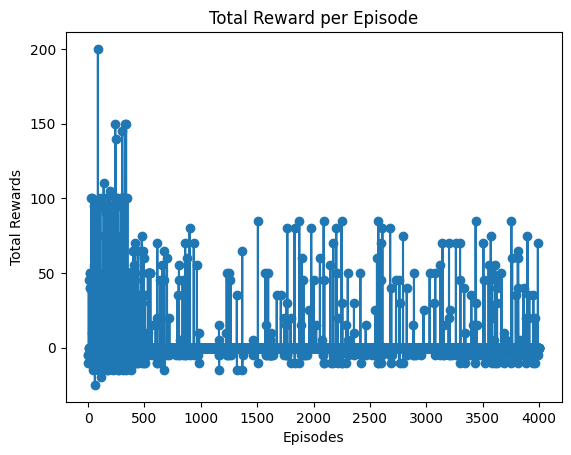

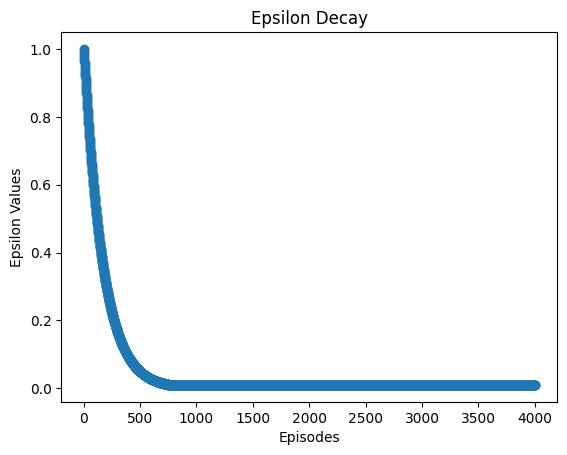

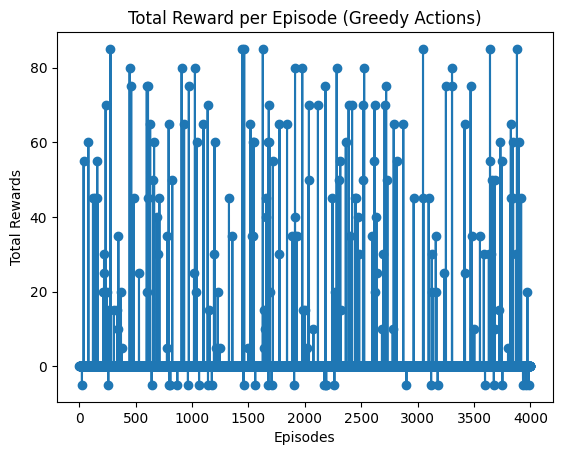

In [27]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the Double-Q agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes + 1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the Double-Q agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using Double-Q agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using Double Q-learning agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using Double Q-learning update rule
        agent.update_q_tables(state, action_index, reward, next_state)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-tables
print("Trained Q-table 1: 🔽")
print(agent.q_table1)
print("Trained Q-table 2: 🔽")
print(agent.q_table2)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes + 1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes + 1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the Double Q-learning agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using Double Q-learning agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [28]:
# SET 5 : gamma = 0.95

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating Double Q-learning agent with modified parameters
agent = DoubleQAgent(env.action_space, env.observation_space, gamma= 0.95)

# Printing the initial Q-tables
print("Initial Q-table 1: 🔽")
print(agent.q_table1)
print("Initial Q-table 2: 🔽")
print(agent.q_table2)

Initial Q-table 1: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Initial Q-table 2: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: -10
Episode 2, Cumulative Reward: 10
Episode 3, Cumulative Reward: 0
Episode 4, Cumulative Reward: 0
Episode 5, Cumulative Reward: 0
Episode 6, Cumulative Reward: 0
Episode 7, Cumulative Reward: -10
Episode 8, Cumulative Reward: 50
Episode 9, Cumulative Reward: -5
Episode 10, Cumulative Reward: 40
Episode 11, Cumulative Reward: 50
Episode 12, Cumulative Reward: 50
Episode 13, Cumulative Reward: 100
Episode 14, Cumulative Reward: -5
Episode 15, Cumulative Reward: 100
Episode 16, Cumulative Reward: -5
Episode 17, Cumulative Reward: 0
Episode 18, Cumulative Reward: 20
Episode 19, Cumulative Reward: -10
Episode 20, Cumulative Reward: 0
Episode 21, Cumulative Reward: 5
Episode 22, Cumulative Reward: -5
Episode 23, Cumulative Reward: -10
Episode 24, Cumulative Reward: 10
Episode 25, Cumulative Reward: 0
Episode 26, Cumulative Reward: 40
Episode 27, Cumulative Reward: 45
Episode 28, Cumulative Reward: 40
Episode 29, Cumulative Reward: 15
Episode 30, Cumulative Re

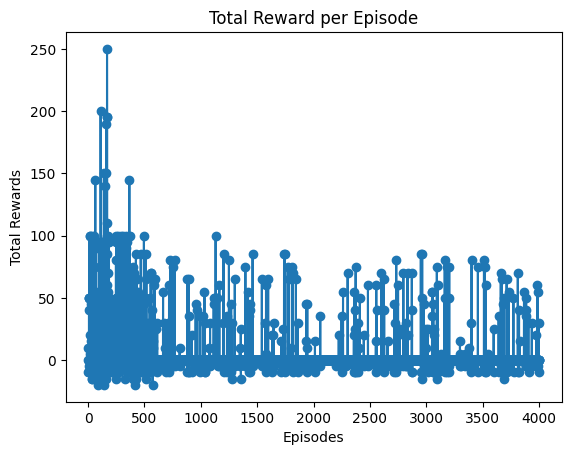

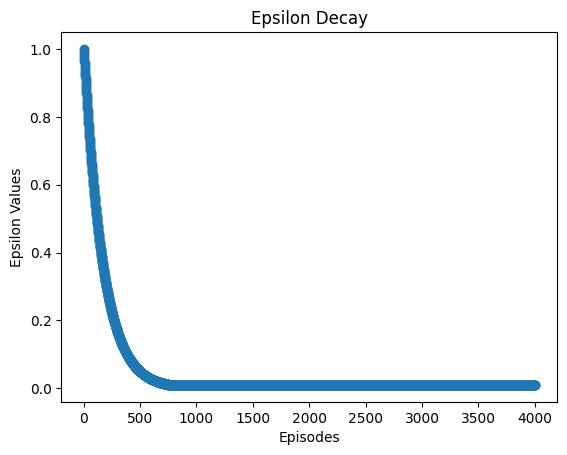

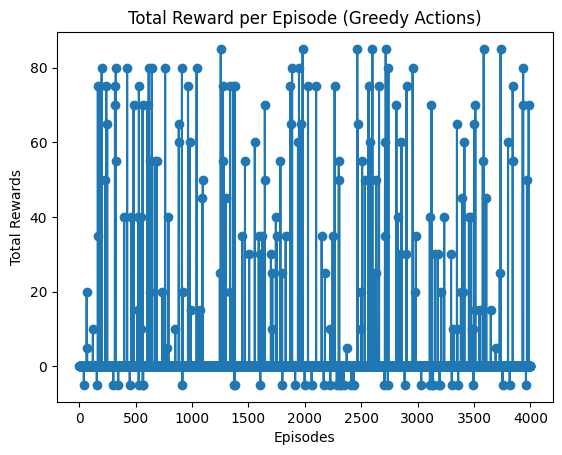

In [29]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the Double-Q agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes + 1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the Double-Q agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using Double-Q agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using Double Q-learning agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using Double Q-learning update rule
        agent.update_q_tables(state, action_index, reward, next_state)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-tables
print("Trained Q-table 1: 🔽")
print(agent.q_table1)
print("Trained Q-table 2: 🔽")
print(agent.q_table2)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes + 1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes + 1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the Double Q-learning agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using Double Q-learning agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [30]:
# SET 5 : gamma = 0.92

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating Double Q-learning agent with modified parameters
agent = DoubleQAgent(env.action_space, env.observation_space, gamma= 0.92)

# Printing the initial Q-tables
print("Initial Q-table 1: 🔽")
print(agent.q_table1)
print("Initial Q-table 2: 🔽")
print(agent.q_table2)

Initial Q-table 1: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Initial Q-table 2: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 100
Episode 2, Cumulative Reward: 100
Episode 3, Cumulative Reward: 45
Episode 4, Cumulative Reward: -5
Episode 5, Cumulative Reward: -15
Episode 6, Cumulative Reward: 50
Episode 7, Cumulative Reward: 50
Episode 8, Cumulative Reward: 50
Episode 9, Cumulative Reward: -10
Episode 10, Cumulative Reward: 0
Episode 11, Cumulative Reward: 100
Episode 12, Cumulative Reward: 50
Episode 13, Cumulative Reward: 0
Episode 14, Cumulative Reward: 95
Episode 15, Cumulative Reward: 0
Episode 16, Cumulative Reward: -10
Episode 17, Cumulative Reward: 95
Episode 18, Cumulative Reward: -10
Episode 19, Cumulative Reward: -5
Episode 20, Cumulative Reward: 5
Episode 21, Cumulative Reward: -5
Episode 22, Cumulative Reward: 0
Episode 23, Cumulative Reward: 65
Episode 24, Cumulative Reward: 45
Episode 25, Cumulative Reward: -10
Episode 26, Cumulative Reward: -5
Episode 27, Cumulative Reward: -5
Episode 28, Cumulative Reward: -10
Episode 29, Cumulative Reward: 0
Episode 30, Cumulati

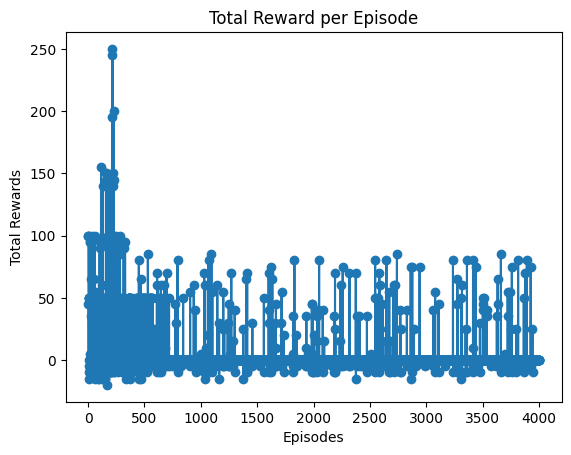

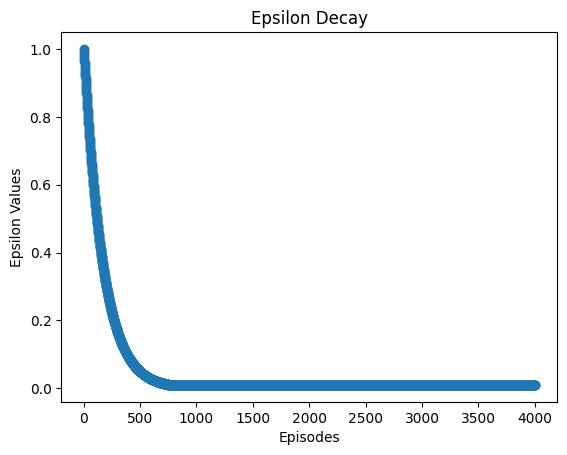

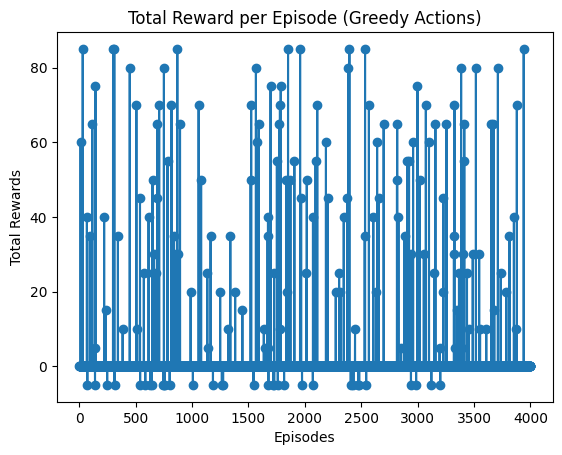

In [31]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the Double-Q agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes + 1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the Double-Q agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using Double-Q agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using Double Q-learning agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using Double Q-learning update rule
        agent.update_q_tables(state, action_index, reward, next_state)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-tables
print("Trained Q-table 1: 🔽")
print(agent.q_table1)
print("Trained Q-table 2: 🔽")
print(agent.q_table2)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes + 1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes + 1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the Double Q-learning agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using Double Q-learning agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [32]:
# SET 6 : gamma = 0.98

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating Double Q-learning agent with modified parameters
agent = DoubleQAgent(env.action_space, env.observation_space, gamma= 0.98)

# Printing the initial Q-tables
print("Initial Q-table 1: 🔽")
print(agent.q_table1)
print("Initial Q-table 2: 🔽")
print(agent.q_table2)

Initial Q-table 1: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Initial Q-table 2: 🔽
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Episode 1, Cumulative Reward: 20
Episode 2, Cumulative Reward: -5
Episode 3, Cumulative Reward: 0
Episode 4, Cumulative Reward: -5
Episode 5, Cumulative Reward: -5
Episode 6, Cumulative Reward: 50
Episode 7, Cumulative Reward: 0
Episode 8, Cumulative Reward: -10
Episode 9, Cumulative Reward: 50
Episode 10, Cumulative Reward: -5
Episode 11, Cumulative Reward: 0
Episode 12, Cumulative Reward: 0
Episode 13, Cumulative Reward: 50
Episode 14, Cumulative Reward: 0
Episode 15, Cumulative Reward: -5
Episode 16, Cumulative Reward: 10
Episode 17, Cumulative Reward: 45
Episode 18, Cumulative Reward: -5
Episode 19, Cumulative Reward: -10
Episode 20, Cumulative Reward: -10
Episode 21, Cumulative Reward: 45
Episode 22, Cumulative Reward: 45
Episode 23, Cumulative Reward: -5
Episode 24, Cumulative Reward: -5
Episode 25, Cumulative Reward: 45
Episode 26, Cumulative Reward: 10
Episode 27, Cumulative Reward: -10
Episode 28, Cumulative Reward: 5
Episode 29, Cumulative Reward: -5
Episode 30, Cumulative Re

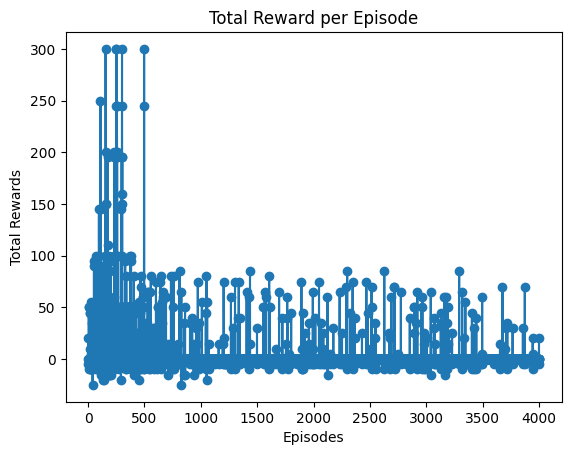

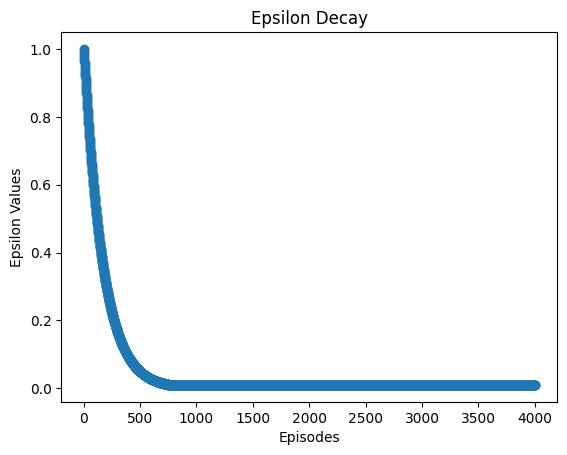

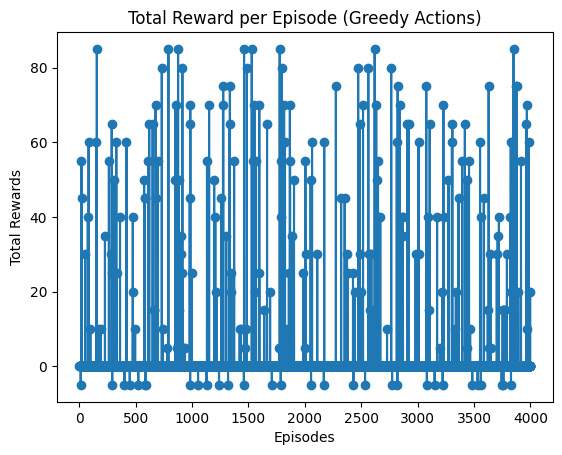

In [33]:
# Resetting the environment
state = env.reset()

# List to store the total reward(s) at every episode
episode_rewards = []

# List to store the epsilon values
epsilons = []

# Running the Double-Q agent for 4000 episodes
custom_episodes = 4000
for episode in range(1, custom_episodes + 1):
    total_reward = 0

    # Storing the epsilons
    epsilons.append(agent.epsilon)

    # Running the Double-Q agent for 20 timesteps
    for step in range(1, 21):
        # Choosing action using Double-Q agent with exploration
        current_agent_state = agent.state[state]
        action_index = agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Choosing the next action using Double Q-learning agent without exploration
        next_agent_state = agent.state[next_state]
        next_action_index = agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        # Recording the total reward for that episode
        total_reward += reward

        '''
        # Debugging prints
        print(f"Step {step}:")
        print(f"Current State: {env.agent_position}")
        print(f"Chosen Action: {action}")
        print(f"Next Action Index: {next_action_index}")
        print(f"Next Action: {next_action}")
        print(f"Reward: {reward}")
        '''

        # Updating the Q-table using Double Q-learning update rule
        agent.update_q_tables(state, action_index, reward, next_state)

        '''
        # Visualizing the environment
        env.render()
        '''

        # Updating the current state
        state = next_state

        # If the episode is done, resetting the environment
        if done:
            state = env.reset()

    # Decaying epsilon after each episode
    agent.decay_epsilon(episode)

    # Appending the total reward value into the list
    episode_rewards.append(total_reward)

    # Printing the cumulative reward for the episode
    print(f"Episode {episode}, Cumulative Reward: {total_reward}")

    # Pausing for 1 second to observe the visualization
    # time.sleep(1)

    # Resetting the environment for the next episode
    state = env.reset()

# Printing the trained Q-tables
print("Trained Q-table 1: 🔽")
print(agent.q_table1)
print("Trained Q-table 2: 🔽")
print(agent.q_table2)

# Plotting the total reward per episode graph (without greedy actions)
plt.plot(range(1, custom_episodes + 1), episode_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode')
plt.show()

# Plotting the epsilon decay graph
plt.plot(range(1, custom_episodes + 1), epsilons, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay')
plt.show()

# Running the environment for at least 4000 episodes with greedy actions
greedy_episodes = 4000
greedy_rewards = []

for episode in range(1, greedy_episodes + 1):
    total_reward = 0

    # Running the Double Q-learning agent for 20 timesteps with greedy actions
    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using Double Q-learning agent without exploration (greedy action)
        action_index = agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards.append(total_reward)

# Plotting the total reward per episode graph (with greedy actions)
plt.plot(range(1, greedy_episodes + 1), greedy_rewards, marker='o')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.show()

In [34]:
# After observing the plots of all the sets - after hyperparameter tuning.
# We can conclude the the lat set (epochs = 4000, gamma = 0.98) to be the
# most efficient as through the greedy actions plot we figured out that
# the agent is reaching the goal state more easily as compared to other sets
# including the base model as well.

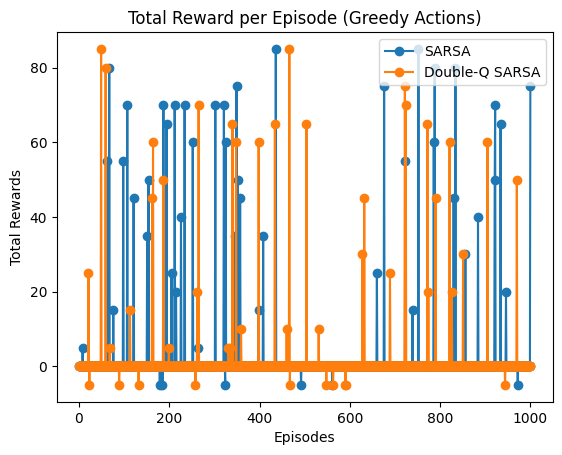

In [37]:
# Lets compare the plots : "Total Rewards per Episode (Greedy Actions)" - for
# both SARSA and Double-Q SARSA

# Plotting & Comparing the total reward per episode graph (with greedy actions)
# for both SARSA and Double-Q SARSA
plt.plot(range(1, greedy_episodes_sarsa_base + 1), greedy_rewards_sarsa_base, marker='o', label = 'SARSA')
plt.plot(range(1, greedy_episodes_doubleQsarsa_base + 1), greedy_rewards_doubleQsarsa_base, marker='o', label = 'Double-Q SARSA')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions)')
plt.legend()
plt.show()

<br>
<br>

# <b>Bonus task</b>


<b>n-step Bootstrapping</b><br>
Implement n-step Bootstrapping (e.g. n-step SARSA). Modify a base algorithm and implement 2-step or 3-step bootstrapping. Compare the results with base algorithm (e.g. SARSA, if you implemented n-step SARSA). In the report, include the comparison.

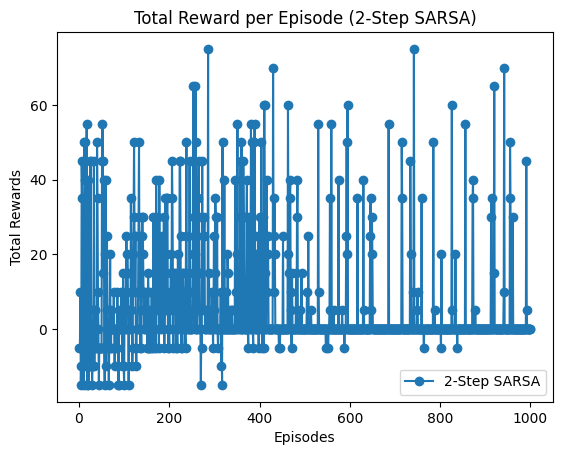

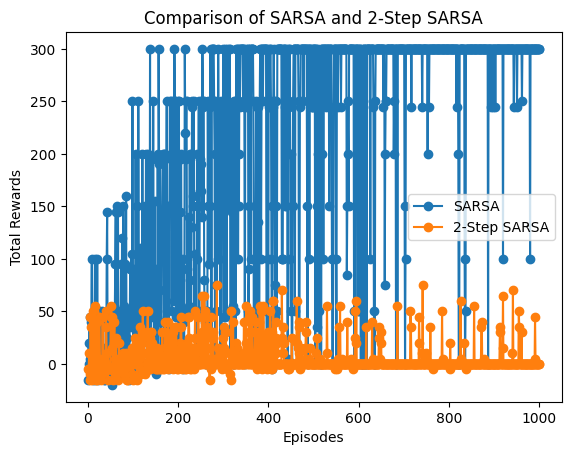

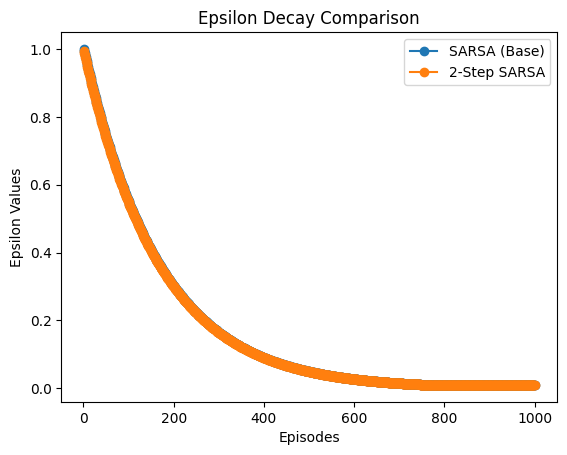

In [38]:
class NStepSarsaAgent:
    def __init__(self, action_space, observation_space, alpha=0.2, gamma=0.99, initial_epsilon=1, epsilon_decay=0.994, n=2):
        self.action_space = action_space
        self.observation_space = observation_space
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = initial_epsilon  # Exploration-exploitation trade-off
        self.epsilon_decay = epsilon_decay  # Epsilon decay factor
        self.q_table = np.full((self.observation_space.n, self.action_space.n), 0)
        self.state = {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3,
                      (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7,
                      (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11,
                      (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15}
        self.n = n  # Number of steps for bootstrapping
        self.rewards_buffer = []
        self.states_buffer = []
        self.actions_buffer = []
        self.epsilons = []  # List to store epsilon values

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.action_space.sample()
        else:
            return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state, next_action):
        self.rewards_buffer.append(reward)
        self.states_buffer.append(state)
        self.actions_buffer.append(action)

        if len(self.rewards_buffer) >= self.n:
            G = sum([(self.gamma ** i) * self.rewards_buffer[i] for i in range(self.n)])
            if len(self.rewards_buffer) > self.n:
                last_state = self.states_buffer.pop(0)
                last_action = self.actions_buffer.pop(0)
                G += (self.gamma ** (self.n - 1)) * self.q_table[last_state, last_action]

            self.q_table[self.states_buffer[0], self.actions_buffer[0]] += self.alpha * (G - self.q_table[self.states_buffer[0], self.actions_buffer[0]])

    def decay_epsilon(self, episode_number):
        self.epsilon *= self.epsilon_decay
        min_epsilon = 0.01
        self.epsilon = max(self.epsilon, min_epsilon)
        self.epsilons.append(self.epsilon)  # Collecting epsilon values

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Creating 2-step SARSA agent with modified parameters
n_step_agent = NStepSarsaAgent(env.action_space, env.observation_space, n=2)

# Resetting the environment
state = env.reset()

# Running the 2-step SARSA agent for 1000 episodes
n_step_episodes = 1000
n_step_rewards = []

for episode in range(1, n_step_episodes + 1):
    total_reward = 0

    for step in range(1, 21):
        current_agent_state = n_step_agent.state[state]
        action_index = n_step_agent.choose_action(current_agent_state)
        action = env.actions[action_index]

        next_state, reward, done = env.step(action)

        next_agent_state = n_step_agent.state[next_state]
        next_action_index = n_step_agent.choose_action(next_agent_state)
        next_action = env.actions[next_action_index]

        total_reward += reward

        n_step_agent.update_q_table(current_agent_state, action_index, reward, next_agent_state, next_action_index)

        state = next_state

        if done:
            state = env.reset()

    n_step_agent.decay_epsilon(episode)
    n_step_rewards.append(total_reward)

# Plotting the total reward per episode graph for 2-step SARSA
plt.plot(range(1, n_step_episodes + 1), n_step_rewards, marker='o', label='2-Step SARSA')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (2-Step SARSA)')
plt.legend()
plt.show()

# Comparing the results with the base SARSA agent
plt.plot(range(1, custom_episodes_sarsa_base + 1), episode_rewards_sarsa_base, marker='o', label='SARSA')
plt.plot(range(1, n_step_episodes + 1), n_step_rewards, marker='o', label='2-Step SARSA')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Comparison of SARSA and 2-Step SARSA')
plt.legend()
plt.show()

# Plotting the epsilon decay graph for SARSA (Base) and 2-step SARSA
plt.plot(range(1, custom_episodes_sarsa_base + 1), epsilons_sarsa_base, marker='o', label='SARSA (Base)')
plt.plot(range(1, n_step_episodes + 1), n_step_agent.epsilons, marker='o', label='2-Step SARSA')
plt.xlabel('Episodes')
plt.ylabel('Epsilon Values')
plt.title('Epsilon Decay Comparison')
plt.legend()
plt.show()

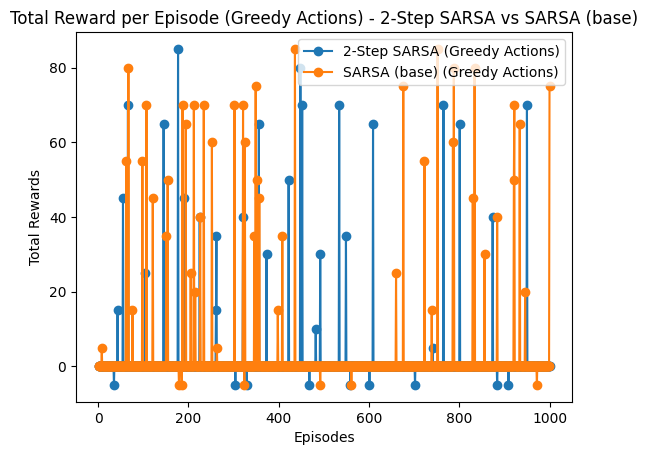

In [39]:
# Running the 2-step SARSA agent for 1000 episodes with greedy actions
greedy_episodes_2_step_sarsa = 1000
greedy_rewards_2_step_sarsa = []

for episode in range(1, greedy_episodes_2_step_sarsa + 1):
    total_reward = 0

    state = env.reset()  # Resetting the environment for each episode
    for step in range(1, 21):
        # Choosing action using 2-step SARSA agent without exploration (greedy action)
        action_index = n_step_agent.choose_action(state)
        action = env.actions[action_index]

        # Taking a step in the environment based on the chosen action
        next_state, reward, done = env.step(action)

        # Recording the total reward for that episode
        total_reward += reward

        # Updating the current state
        state = next_state

        # If the episode is done, breaking the inner loop
        if done:
            break

    # Appending the total reward value into the list
    greedy_rewards_2_step_sarsa.append(total_reward)

# Plotting the total reward per episode graph for 2-step SARSA and SARSA (base) with greedy actions
plt.plot(range(1, greedy_episodes_2_step_sarsa + 1), greedy_rewards_2_step_sarsa, marker='o', label='2-Step SARSA (Greedy Actions)')
plt.plot(range(1, greedy_episodes_sarsa_base + 1), greedy_rewards_sarsa_base, marker='o', label='SARSA (base) (Greedy Actions)')
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Total Reward per Episode (Greedy Actions) - 2-Step SARSA vs SARSA (base)')
plt.legend()
plt.show()

<br>
<br>

<b>Grid-World Scenario Visualization</b><br>
Add custom-defined images into your grid world env to represent:<br>
• Agent: at least two images dependent on what the agent is doing<br>
• Background: a setup that represents your scenario (different from the default one)<br>
• Images representing each object in your scenario<br>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

TypeError: ignored

<Figure size 640x480 with 1 Axes>

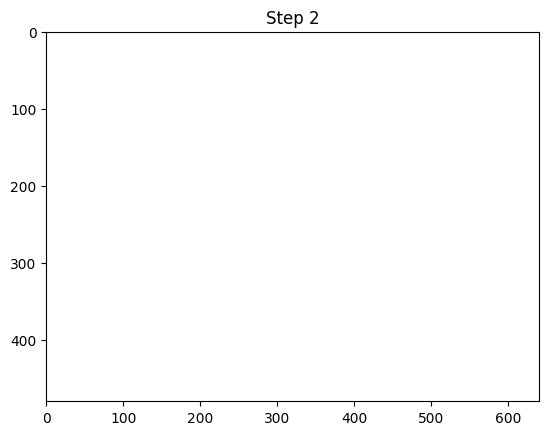

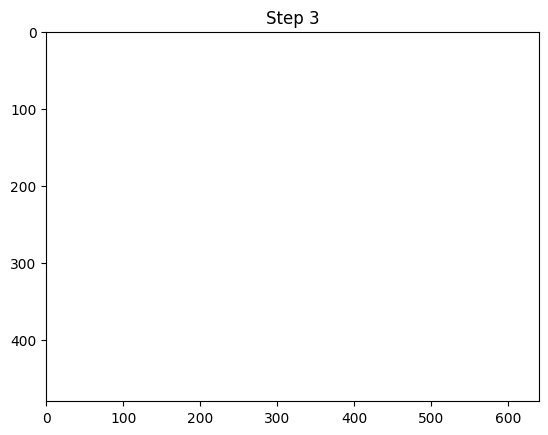

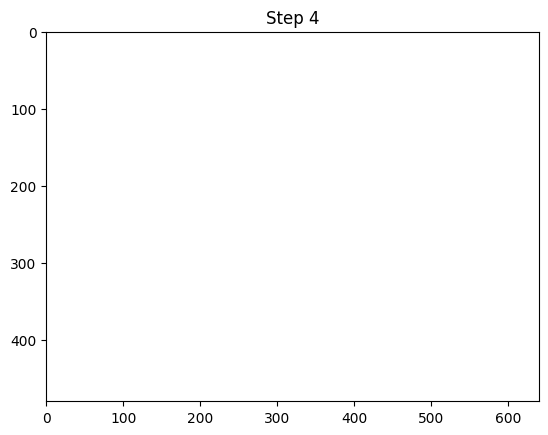

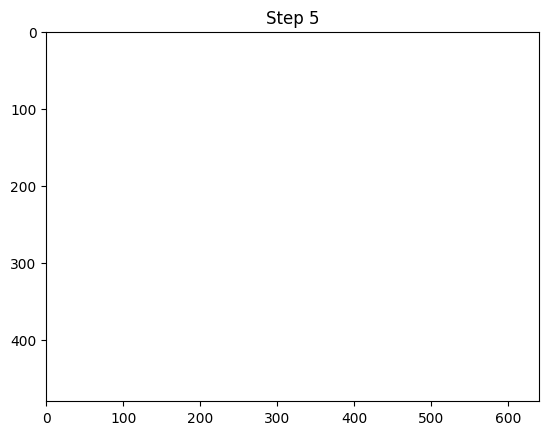

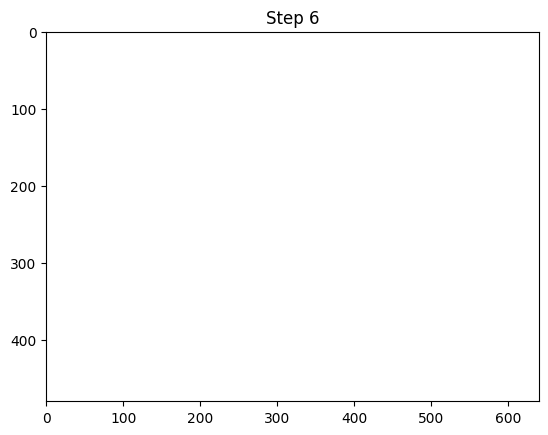

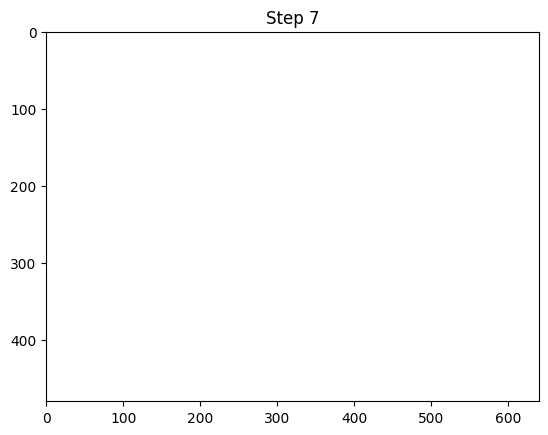

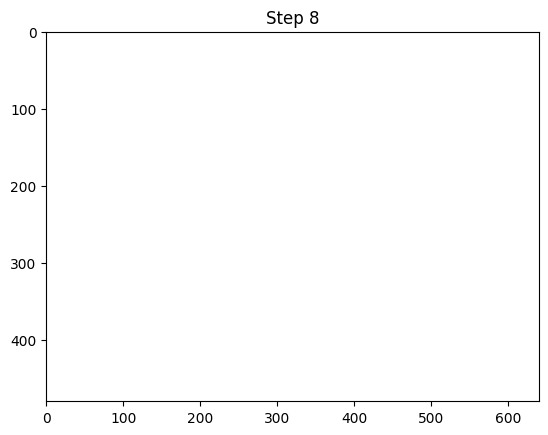

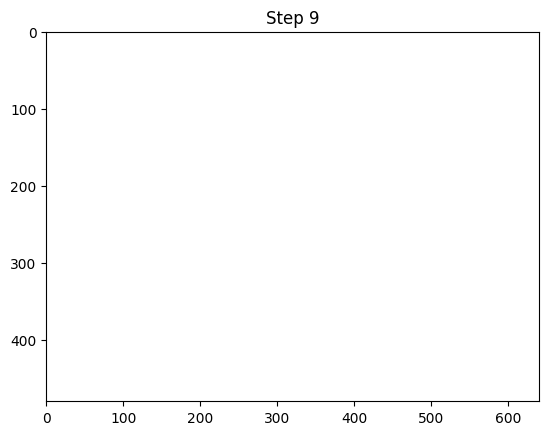

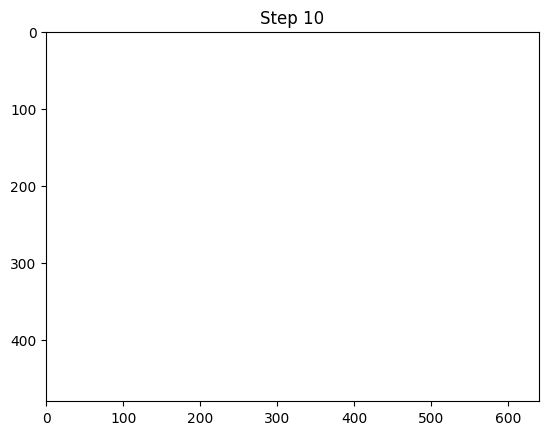

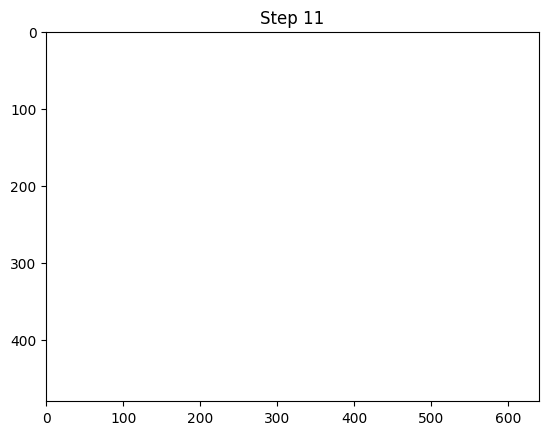

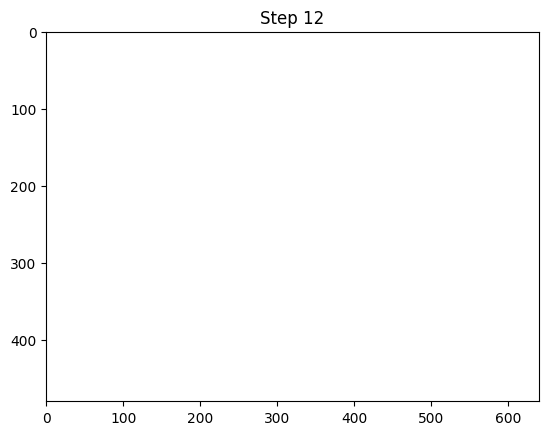

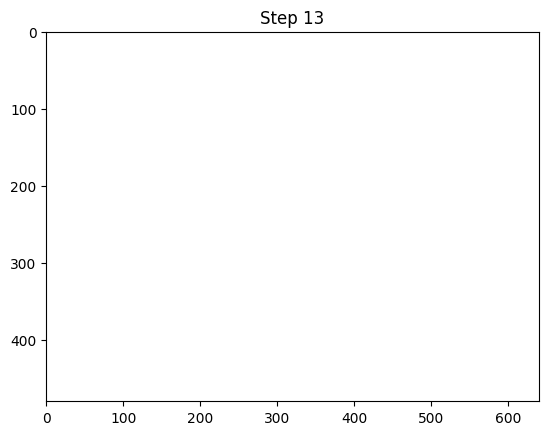

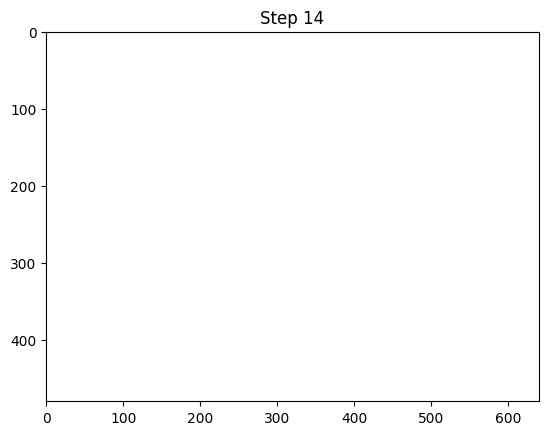

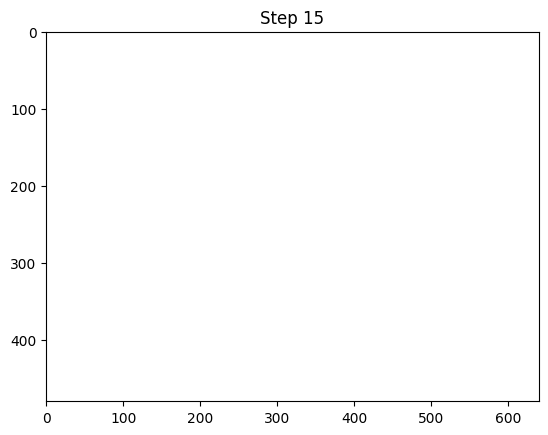

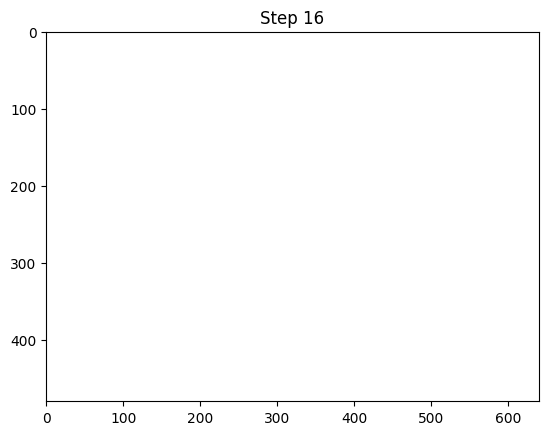

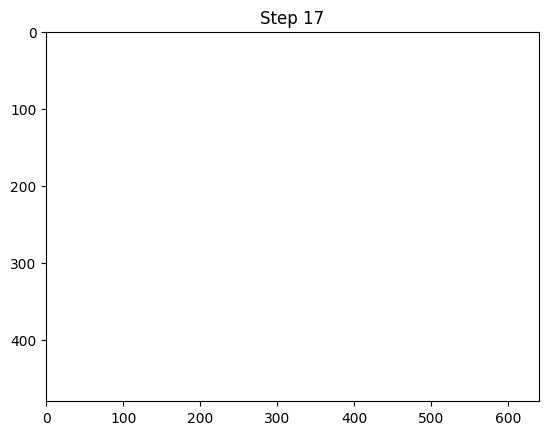

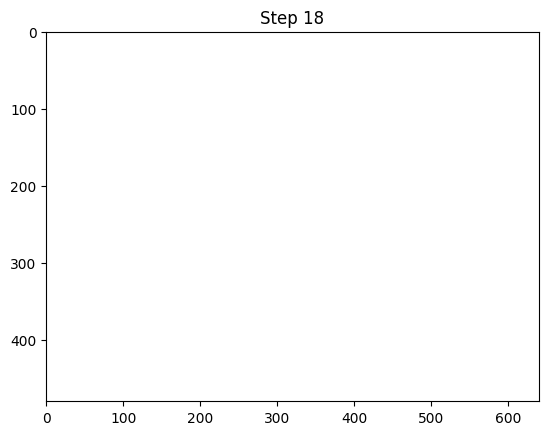

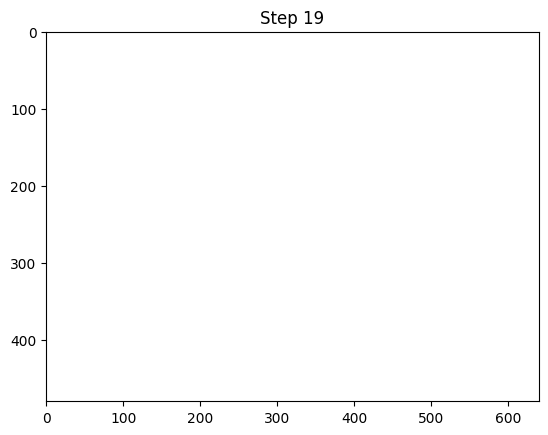

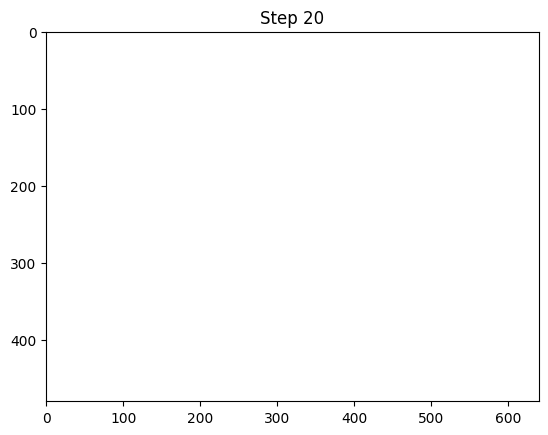

Step 1:
Current State: (1, 0)
Chosen Action: UP
Reward: 0
Step 2:
Current State: (1, 1)
Chosen Action: RIGHT
Reward: 0
Step 3:
Current State: (1, 2)
Chosen Action: RIGHT
Reward: 0
Step 4:
Current State: (1, 1)
Chosen Action: LEFT
Reward: 0
Step 5:
Current State: (1, 2)
Chosen Action: RIGHT
Reward: 0
Step 6:
Current State: (2, 2)
Chosen Action: UP
Reward: 0
Step 7:
Current State: (2, 1)
Chosen Action: LEFT
Reward: -5
Step 8:
Current State: (2, 0)
Chosen Action: LEFT
Reward: 0
Step 9:
Current State: (2, 1)
Chosen Action: RIGHT
Reward: -5
Step 10:
Current State: (1, 1)
Chosen Action: DOWN
Reward: 0
Step 11:
Current State: (1, 0)
Chosen Action: LEFT
Reward: 0
Step 12:
Current State: (2, 0)
Chosen Action: UP
Reward: 0
Step 13:
Current State: (1, 0)
Chosen Action: DOWN
Reward: 0
Step 14:
Current State: (1, 1)
Chosen Action: RIGHT
Reward: 0
Step 15:
Current State: (0, 1)
Chosen Action: DOWN
Reward: 0
Step 16:
Current State: (0, 1)
Chosen Action: DOWN
Reward: 0
Step 17:
Current State: (0, 2)
C

In [40]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

class TreasureHuntEnv(gym.Env):
    def __init__(self):
        super(TreasureHuntEnv, self).__init__()

        # Environment parameters
        self.grid_size = 4
        self.states = [(i, j) for i in range(self.grid_size) for j in range(self.grid_size)]
        self.actions = ['UP', 'DOWN', 'RIGHT', 'LEFT']

        # Defining action and observation spaces
        self.action_space = spaces.Discrete(len(self.actions))
        self.observation_space = spaces.Discrete(len(self.states))

        # Initial positions of treasure, obstacle, checkpoint, and agent
        self.treasure = (3,3)
        self.obstacle = (2,1)
        self.checkpoint = (3,1)
        self.agent_position = (0, 0)
        self.max_steps = 20
        self.current_step = 0

        # Defining file paths for custom images (JPG format)
        self.agent_image_path = "/content/drive/MyDrive/ML A3 - images/agent_image.jpg"
        self.background_image_path = "/content/drive/MyDrive/ML A3 - images/background_image.jpg"
        self.treasure_image_path = "/content/drive/MyDrive/ML A3 - images/treasure_image.jpg"
        self.obstacle_image_path = "/content/drive/MyDrive/ML A3 - images/obstacle_image.jpg"
        self.checkpoint_image_path = "/content/drive/MyDrive/ML A3 - images/checkpoint_image.jpg"

        # Loading images
        self.agent_image = Image.open(self.agent_image_path)
        self.background_image = Image.open(self.background_image_path)
        self.treasure_image = Image.open(self.treasure_image_path)
        self.obstacle_image = Image.open(self.obstacle_image_path)
        self.checkpoint_image = Image.open(self.checkpoint_image_path)

        # List to store images
        self.visualization_images = []

    def reset(self):
        # Resetting the environment to its initial state
        # Changing initial positions to ensure the agent reaches the treasure without obstacles
        self.treasure = (0, 3)
        self.obstacle = (2, 1)
        self.checkpoint = (3, 1)
        self.agent_position = (0, 0)
        self.current_step = 0

        # Clearing the list of visualization images
        self.visualization_images = []

        return self.agent_position

    def step(self, action):
        # Taking a step in the environment based on the given action
        if action not in self.actions:
            raise ValueError("Invalid action. Choose from {}".format(self.actions))

        # Checking if the maximum number of steps is reached
        if self.current_step >= self.max_steps:
            return self.agent_position, 0, True

        self.current_step += 1
        new_position = self.get_new_position(action)

        # Determining the reward and whether the episode is done
        reward = 0
        done=False
        if new_position == self.treasure:
            reward = 50
            done = True
        elif new_position == self.obstacle:
            reward = -5
            done = True
        elif new_position == self.checkpoint:
            reward = 5
            done = False

        self.agent_position = new_position
        return self.agent_position, reward, done

    def render(self):
        fig, ax = plt.subplots()
        ax.clear()

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if (i, j) == self.agent_position:
                    self.plot_image(ax, self.agent_image, j, i, zoom=0.3)  # Agent position
                elif (i, j) == self.treasure:
                    self.plot_image(ax, self.treasure_image, j, i, zoom=0.3)  # Treasure
                elif (i, j) == self.obstacle:
                    self.plot_image(ax, self.obstacle_image, j, i, zoom=0.3)  # Obstacle
                elif (i, j) == self.checkpoint:
                    self.plot_image(ax, self.checkpoint_image, j, i, zoom=0.3)  # Checkpoint
                else:
                    self.plot_image(ax, self.background_image, j, i, zoom=0.3)  # Background

        ax.set_xticks(np.arange(-.5, self.grid_size, 1), minor=True)
        ax.set_yticks(np.arange(-.5, self.grid_size, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)

        display.clear_output(wait=True)
        display.display(fig)

        # Saving the current state as an image and append to the list
        image = np.array(fig.canvas.renderer.buffer_rgba())
        self.visualization_images.append(image)

    def get_new_position(self, action):
      if action == 'UP':
          return min(self.agent_position[0] + 1, self.grid_size - 1), self.agent_position[1]
      elif action == 'DOWN':
          return max(self.agent_position[0] - 1, 0), self.agent_position[1]
      elif action == 'RIGHT':
          return self.agent_position[0], min(self.agent_position[1] + 1, self.grid_size - 1)
      elif action == 'LEFT':
          return self.agent_position[0], max(self.agent_position[1] - 1, 0)

    def plot_image(self, ax, image, x, y, zoom=0.8):
        # Resizing the image to fit within the grid
        target_width = 1.0  # width of one grid cell
        target_height = 1.0  # height of one grid cell

        # Calculating the zoom factors for width and height
        zoom_x = target_width / (zoom * image.width)
        zoom_y = target_height / (zoom * image.height)

        # Resizing the image
        resized_image = image.resize((int(zoom * image.width), int(zoom * image.height)))

        # Creating the OffsetImage and AnnotationBbox
        imagebox = OffsetImage(resized_image, zoom=(zoom_x, zoom_y), resample=True)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0.0, boxcoords="axes points")
        ax.add_artist(ab)

# Using the Treasure Hunt environment with visualization
env = TreasureHuntEnv()

# Resetting the environment
state = env.reset()

# We need to store the results that we obtain at every single step
# We will later on print them altogether
steps = []
agent_positions = []
agent_actions = []
agent_rewards = []

# Running a random agent for 20 timesteps
for step in range(1, 21):
    action = env.action_space.sample()  # Random action
    next_state, reward, done = env.step(env.actions[action])

    # Printing current state, chosen action, reward
    print(f"Step {step}:")
    steps.append(step)
    print(f"Current State: {env.agent_position}")
    agent_positions.append(env.agent_position)
    print(f"Chosen Action: {env.actions[action]}")
    agent_actions.append(env.actions[action])
    print(f"Reward: {reward}")
    agent_rewards.append(reward)

    # Visualizing the environment
    env.render()

    time.sleep(1)  # Pausing for 1 second to observe the visualization

# Displaying all stored grid views at the end
for i, image in enumerate(env.visualization_images):
    plt.imshow(image)
    plt.title(f"Step {i + 1}")
    plt.show()

# Displaying all the step results
for i, j, k, l in zip(steps, agent_positions, agent_actions, agent_rewards):
    print(f"Step {i}:")
    print(f"Current State: {j}")
    print(f"Chosen Action: {k}")
    print(f"Reward: {l}")